<a href="https://colab.research.google.com/github/piaoruilin/20251R0136COSE47101/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving top-10_max_weeks.csv to top-10_max_weeks.csv
Saving top-10_with_genres_keywords.csv to top-10_with_genres_keywords.csv


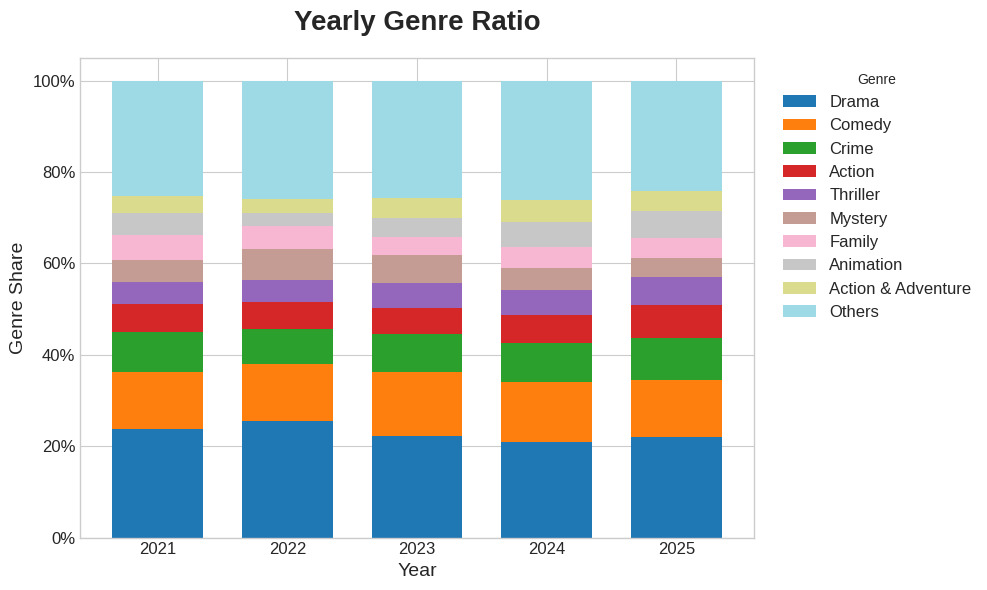

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
df = pd.read_csv('top-10_with_genres_keywords.csv')
df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

# Í∞Å ÏòÅÌôî/ÏáºÎ•º Ïû•Î•¥Î≥ÑÎ°ú Î∂ÑÎ¶¨ (explode)
df_exploded = df.explode('genres')

# --- 2. Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥ ÎπÑÏú® Í≥ÑÏÇ∞ ---
# Ïó∞ÎèÑÏôÄ Ïû•Î•¥Î≥ÑÎ°ú Îì±Ïû• ÌöüÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
genre_counts = df_exploded.groupby(['year', 'genres']).size().reset_index(name='count')

# ÌîºÎ≤ó ÌÖåÏù¥Î∏îÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Íµ¨ÏÑ±Ìï©ÎãàÎã§. (Ïó∞ÎèÑÎ≥ÑÎ°ú Ïû•Î•¥Ïùò Îì±Ïû• ÌöüÏàò)
pivot_df = genre_counts.pivot(index='year', columns='genres', values='count').fillna(0)

# Í∞Å Ïó∞ÎèÑ(Ìñâ)Ïùò Ìï©Í≥ÑÎ°ú ÎÇòÎàÑÏñ¥ ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
ratio_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# --- 3. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ ---
# Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎèôÏïàÏùò ÌèâÍ∑† ÎπÑÏú®ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 9Í∞ú Ïû•Î•¥Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§.
top_genres = ratio_df.mean().nlargest(9).index

# ÏÉÅÏúÑ 9Í∞ú Ïû•Î•¥ÏôÄ 'Others'Î°ú Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Íµ¨ÏÑ±Ìï©ÎãàÎã§.
df_plot = ratio_df[top_genres].copy()
df_plot['Others'] = 1 - df_plot.sum(axis=1) # 1(100%)ÏóêÏÑú ÏÉÅÏúÑ Ïû•Î•¥ ÎπÑÏú®ÏùÑ ÎπºÏÑú 'Others'Î•º Í≥ÑÏÇ∞

# --- 4. 100% ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî ---
plt.style.use('seaborn-v0_8-whitegrid')
# (ÏàòÏ†ï) Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞Î•º (12, 7)Î°ú Ï§ÑÏûÖÎãàÎã§.
fig, ax = plt.subplots(figsize=(10, 6))

# 100% ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
df_plot.plot(kind='bar', stacked=True, ax=ax, width=0.7, cmap='tab20')

# (ÏàòÏ†ï) Í∑∏ÎûòÌîÑÏùò Ï†úÎ™©Í≥º Ï∂ï Ïù¥Î¶ÑÏùÑ ÏòÅÎ¨∏ÏúºÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
ax.set_title('Yearly Genre Ratio', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Genre Share', fontsize=14)
ax.tick_params(axis='x', rotation=0) # xÏ∂ï ÎùºÎ≤®ÏùÑ ÏàòÌèâÏúºÎ°ú ÌëúÏãú
ax.tick_params(axis='both', labelsize=12)

# YÏ∂ï Î†àÏù¥Î∏îÏùÑ ÌçºÏÑºÌä∏(%) ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

# (ÏàòÏ†ï) Î≤îÎ°Ä Ï†úÎ™©ÏùÑ ÏòÅÎ¨∏ÏúºÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
ax.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# 1. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
!pip install mlxtend

--- 2. 'Ï°∞ÌöåÏàò Í∏∞Î∞ò' Ïû•Î•¥ Ï†êÏú†Ïú® Í≥ÑÏÇ∞ Ï§ë ---

--- ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥Ïóê ÎåÄÌïú ÎØ∏Îûò Ï†êÏú†Ïú® ÏòàÏ∏° (Prophet, Ï°∞ÌöåÏàò Í∏∞Î∞ò) ---
Î∂ÑÏÑù ÎåÄÏÉÅ Ïû•Î•¥: ['Drama', 'Comedy', 'Crime', 'Mystery', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Action', 'Thriller', 'Family', 'Animation']


INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/_k_kppue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/f6vvp42t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28565', 'data', 'file=/tmp/tmpqmuqcpnx/_k_kppue.json', 'init=/tmp/tmpqmuqcpnx/f6vvp42t.json', 'output', 'file=/tmp/tmpqmuqcpnx/prophet_modeluji8b12u/prophet_model-20250611062232.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/qv54k29e.json
DEBUG:cmdstanpy:input tempfile


ÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


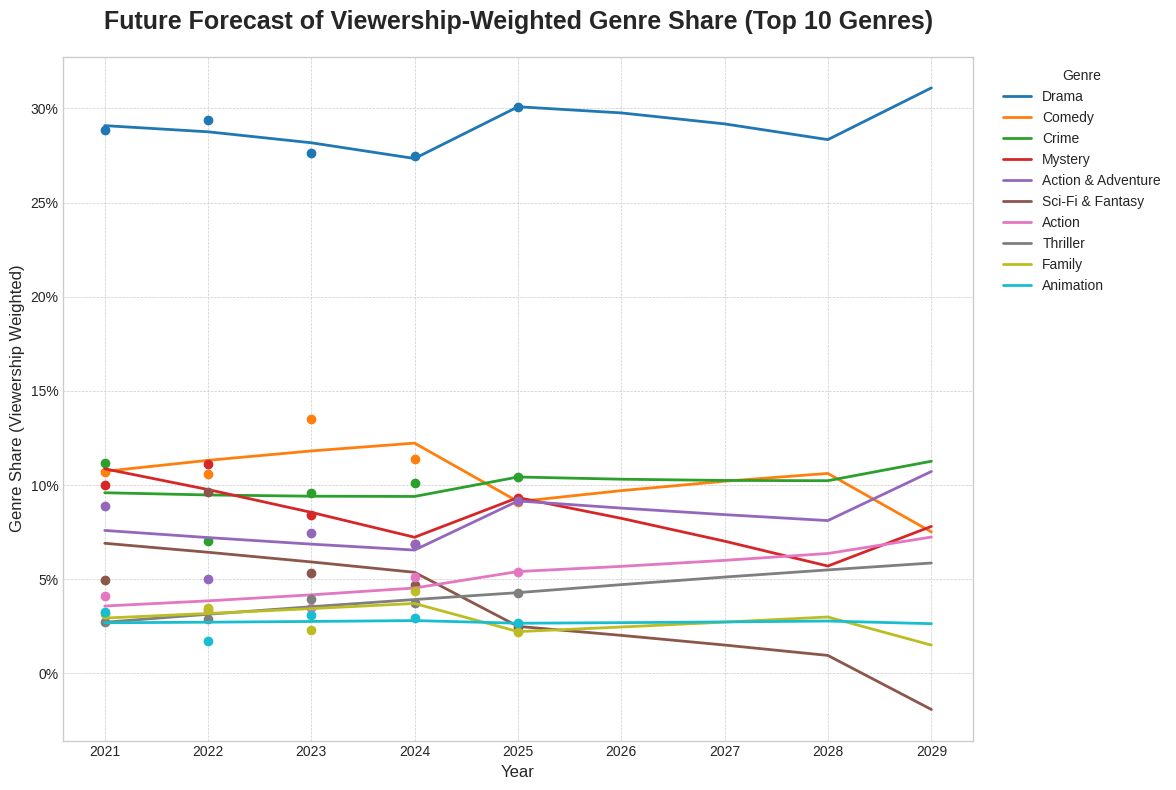


--- Ìñ•ÌõÑ 4ÎÖÑÍ∞Ñ Ïû•Î•¥Î≥Ñ ÏòàÏÉÅ Ï†êÏú†Ïú® (%) (Ï°∞ÌöåÏàò Í∏∞Î∞ò) ---
      Drama  Comedy  Crime  Mystery  Action & Adventure  Sci-Fi & Fantasy  Action  Thriller  Family  Animation
ds                                                                                                            
2026 29.76%   9.71% 10.31%    8.24%               8.78%             2.02%   5.69%     4.72%   2.47%      2.70%
2027 29.18%  10.21% 10.25%    7.03%               8.43%             1.51%   6.01%     5.12%   2.73%      2.74%
2028 28.35%  10.62% 10.24%    5.70%               8.12%             0.96%   6.37%     5.50%   3.00%      2.78%
2029 31.09%   7.52% 11.27%    7.81%              10.73%            -1.91%   7.24%     5.87%   1.51%      2.64%


In [5]:
import pandas as pd
import ast
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # ÏÉâÏÉÅ ÏßÄÏ†ïÏùÑ ÏúÑÌï¥ import
import numpy as np
import warnings

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Ïà®Í∏∞Í∏∞
warnings.filterwarnings("ignore")

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

# --- 2. "Ï°∞ÌöåÏàò Í∏∞Î∞ò" Ïû•Î•¥ Ï†êÏú†Ïú® Í≥ÑÏÇ∞ ---
print("--- 2. 'Ï°∞ÌöåÏàò Í∏∞Î∞ò' Ïû•Î•¥ Ï†êÏú†Ïú® Í≥ÑÏÇ∞ Ï§ë ---")
df_exploded = df.explode('genres')
genre_viewership = df_exploded.groupby(['year', 'genres'])['weekly_hours_viewed'].sum().reset_index(name='total_genre_viewership')
pivot_viewership_df = genre_viewership.pivot(index='year', columns='genres', values='total_genre_viewership').fillna(0)
total_viewership_tags_per_year = pivot_viewership_df.sum(axis=1)
ratio_viewership_df = pivot_viewership_df.div(total_viewership_tags_per_year, axis=0)
ratio_viewership_df = ratio_viewership_df.fillna(0)

# ProphetÏùÑ ÏúÑÌï¥ ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò ('2021' -> '2021-01-01')
ratio_viewership_df.index = pd.to_datetime(ratio_viewership_df.index.astype(str) + '-01-01')

# --- 3. ProphetÏùÑ ÏÇ¨Ïö©Ìïú ÎØ∏Îûò ÏòàÏ∏° Ïã§Ìñâ ---
# Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎèôÏïàÏùò ÌèâÍ∑† "Ï°∞ÌöåÏàò Í∏∞Î∞ò Ï†êÏú†Ïú®"ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§.
top_n = 10
if ratio_viewership_df.empty:
    print("Ï°∞ÌöåÏàò Í∏∞Î∞ò Ï†êÏú†Ïú® Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit()
top_genres = ratio_viewership_df.mean().nlargest(top_n).index.tolist()

# ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
all_forecasts_df = pd.DataFrame()

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Figure Ï§ÄÎπÑ
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Í∞Å Ïû•Î•¥Ïóê ÎåÄÌïú ÏÉâÏÉÅ Îßµ ÏÉùÏÑ±
colors = cm.get_cmap('tab10', len(top_genres))

print(f"\n--- ÏÉÅÏúÑ {len(top_genres)}Í∞ú Ïû•Î•¥Ïóê ÎåÄÌïú ÎØ∏Îûò Ï†êÏú†Ïú® ÏòàÏ∏° (Prophet, Ï°∞ÌöåÏàò Í∏∞Î∞ò) ---")
print(f"Î∂ÑÏÑù ÎåÄÏÉÅ Ïû•Î•¥: {top_genres}")

for i, genre in enumerate(top_genres):
    if genre not in ratio_viewership_df.columns:
        print(f"Í≤ΩÍ≥†: '{genre}' Ïû•Î•¥Í∞Ä Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue

    # ProphetÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± ('ds'ÏôÄ 'y' Ïª¨ÎüºÎ™Ö ÏÇ¨Ïö©)
    prophet_df = ratio_viewership_df[[genre]].reset_index()
    prophet_df.columns = ['ds', 'y']

    # Prophet Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(prophet_df)

    # ÎØ∏Îûò ÏòàÏ∏° (Ìñ•ÌõÑ 4ÎÖÑ)
    future = model.make_future_dataframe(periods=4, freq='YS') # YS: Ïó∞Ï¥à(Year Start) Í∏∞Ï§Ä
    forecast = model.predict(future)

    # ÏãúÍ∞ÅÌôî: Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞(Ï†ê)ÏôÄ ÎØ∏Îûò ÏòàÏ∏°(ÏÑ†)ÏùÑ Ìï®Íªò Í∑∏Î¶ΩÎãàÎã§.
    ax.plot(prophet_df['ds'], prophet_df['y'], 'o', color=colors(i), markersize=6)
    ax.plot(forecast['ds'], forecast['yhat'], '-', color=colors(i), linewidth=2, label=f'{genre}')

    # ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÄÏû•
    forecast_subset = forecast[['ds', 'yhat']].rename(columns={'yhat': genre})
    if all_forecasts_df.empty:
        all_forecasts_df = forecast_subset
    else:
        all_forecasts_df = pd.merge(all_forecasts_df, forecast_subset, on='ds', how='outer')

print("\nÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

# --- 4. Í∑∏ÎûòÌîÑ ÏµúÏ¢Ö ÏÑ§Ï†ï ---
ax.set_title(f'Future Forecast of Viewership-Weighted Genre Share (Top {top_n} Genres)', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Genre Share (Viewership Weighted)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
ax.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# --- 5. ÏòàÏ∏° Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†• ---
if not all_forecasts_df.empty:
    all_forecasts_df['ds'] = all_forecasts_df['ds'].dt.year
    all_forecasts_df = all_forecasts_df.set_index('ds')

    print("\n--- Ìñ•ÌõÑ 4ÎÖÑÍ∞Ñ Ïû•Î•¥Î≥Ñ ÏòàÏÉÅ Ï†êÏú†Ïú® (%) (Ï°∞ÌöåÏàò Í∏∞Î∞ò) ---")
    future_predictions = all_forecasts_df.tail(4) * 100
    # NaNÏùÄ ÏòàÏ∏° Î™ªÌïú Ïû•Î•¥Ïùº Ïàò ÏûàÏúºÎØÄÎ°ú 0ÏúºÎ°ú Ï±ÑÏõåÏÑú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•
    print(future_predictions.fillna(0).to_string(float_format='{:.2f}%'.format))
else:
    print("\nÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Í≤∞Í≥º ÌÖåÏù¥Î∏îÏùÑ Ï∂úÎ†•Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/iuo6us52.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/904vi13z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48442', 'data', 'file=/tmp/tmpqmuqcpnx/iuo6us52.json', 'init=/tmp/tmpqmuqcpnx/904vi13z.json', 'output', 'file=/tmp/tmpqmuqcpnx/prophet_modelgyxlkyj3/prophet_model-20250611062638.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:26:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


--- 2. 'Top 10 Ïä¨Î°ØÎãπ ÌèâÍ∑† Ïû•Î•¥ ÌÉúÍ∑∏ Ïàò' Í≥ÑÏÇ∞ Ï§ë ---

--- ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥Ïóê ÎåÄÌïú ÎØ∏Îûò ÏòàÏ∏° (Prophet, Ïä¨Î°Ø Í∏∞Î∞ò) ---
Î∂ÑÏÑù ÎåÄÏÉÅ Ïû•Î•¥: ['Drama', 'Comedy', 'Crime', 'Action', 'Thriller', 'Mystery', 'Family', 'Animation', 'Action & Adventure', 'Adventure']


INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/c8knv789.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/nk3bnmtj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25019', 'data', 'file=/tmp/tmpqmuqcpnx/c8knv789.json', 'init=/tmp/tmpqmuqcpnx/nk3bnmtj.json', 'output', 'file=/tmp/tmpqmuqcpnx/prophet_model0oxm9l_m/prophet_model-20250611062638.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:26:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:26:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/3pe31vlo.json
DEBUG:cmdstanpy:input tempfile


ÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


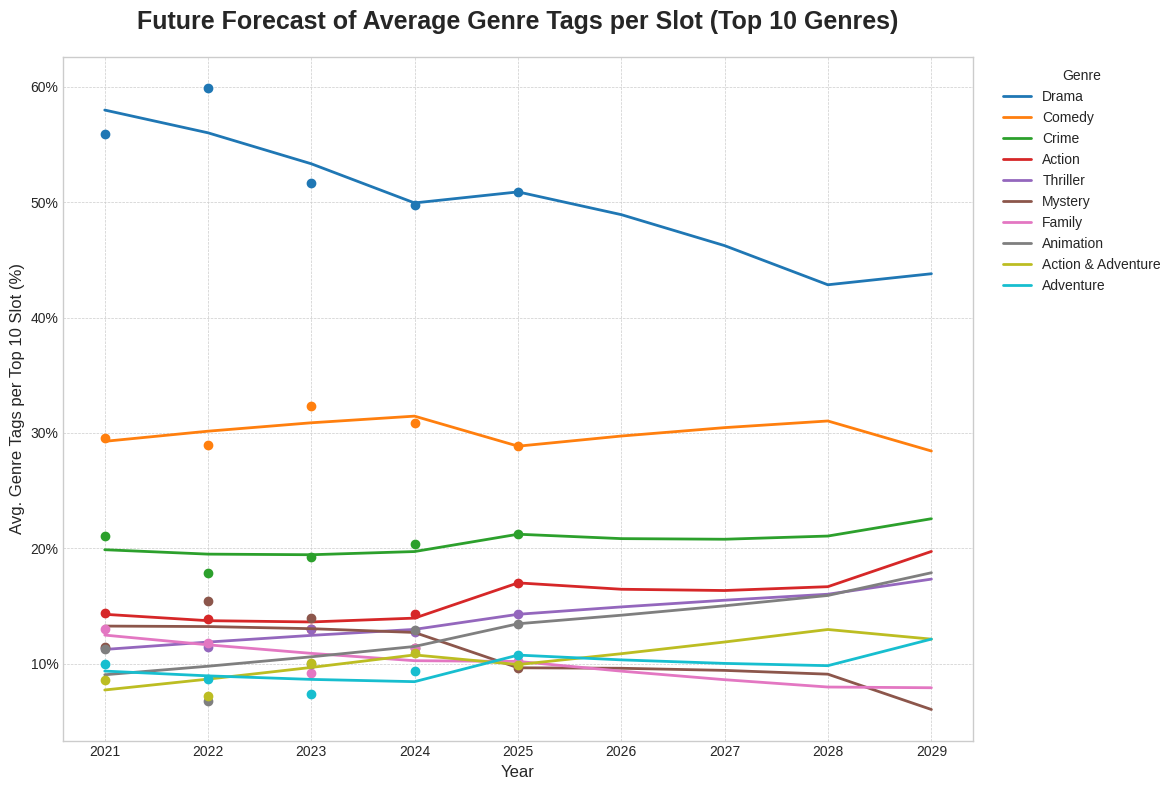


--- Ìñ•ÌõÑ 4ÎÖÑÍ∞Ñ Ïû•Î•¥Î≥Ñ 'Top 10 Ïä¨Î°ØÎãπ ÌèâÍ∑† ÌÉúÍ∑∏ Ïàò' ÏòàÏÉÅÏπò (%) ---
      Drama  Comedy  Crime  Action  Thriller  Mystery  Family  Animation  Action & Adventure  Adventure
ds                                                                                                     
2026 48.91%  29.73% 20.84%  16.45%    14.92%    9.61%   9.36%     14.20%              10.87%     10.33%
2027 46.23%  30.46% 20.79%  16.34%    15.50%    9.42%   8.62%     15.02%              11.88%     10.03%
2028 42.84%  31.03% 21.06%  16.68%    16.02%    9.10%   7.98%     15.92%              12.97%      9.83%
2029 43.79%  28.43% 22.57%  19.73%    17.33%    6.03%   7.92%     17.88%              12.13%     12.13%


In [6]:
import pandas as pd
import ast
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # ÏÉâÏÉÅ ÏßÄÏ†ïÏùÑ ÏúÑÌï¥ import
import numpy as np
import warnings

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Ïà®Í∏∞Í∏∞
warnings.filterwarnings("ignore")

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

# --- 2. "Top 10 Ïä¨Î°ØÎãπ ÌèâÍ∑† Ïû•Î•¥ ÌÉúÍ∑∏ Ïàò" Í≥ÑÏÇ∞ ---
print("--- 2. 'Top 10 Ïä¨Î°ØÎãπ ÌèâÍ∑† Ïû•Î•¥ ÌÉúÍ∑∏ Ïàò' Í≥ÑÏÇ∞ Ï§ë ---")
df_exploded = df.explode('genres')

# Î∂ÑÏûê: Ïó∞ÎèÑÏôÄ Ïû•Î•¥Î≥ÑÎ°ú Îì±Ïû• ÌöüÏàò(Ïñ∏Í∏â ÌöüÏàò)Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
genre_counts_numerator = df_exploded.groupby(['year', 'genres']).size().reset_index(name='count')
pivot_df_numerator = genre_counts_numerator.pivot(index='year', columns='genres', values='count').fillna(0)

# Î∂ÑÎ™®: Í∞Å Ïó∞ÎèÑÎ≥Ñ Ï†ÑÏ≤¥ Top 10 Ïä¨Î°Ø ÏàòÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
yearly_total_slots = df.groupby('year').size()

# ÏÉàÎ°úÏö¥ ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§: (Ïó∞ÎèÑÎ≥Ñ Í∞Å Ïû•Î•¥ Ïñ∏Í∏â ÌöüÏàò) / (Ïó∞ÎèÑÎ≥Ñ Ï†ÑÏ≤¥ Top 10 Ïä¨Î°Ø Ïàò)
ratio_df_slot_normalized = pivot_df_numerator.copy()
for year_val in ratio_df_slot_normalized.index:
    if year_val in yearly_total_slots and yearly_total_slots[year_val] > 0:
        ratio_df_slot_normalized.loc[year_val] = ratio_df_slot_normalized.loc[year_val] / yearly_total_slots[year_val]
    else:
        ratio_df_slot_normalized.loc[year_val] = 0
ratio_df_slot_normalized = ratio_df_slot_normalized.fillna(0)


# ProphetÏùÑ ÏúÑÌï¥ ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò ('2021' -> '2021-01-01')
ratio_df_slot_normalized.index = pd.to_datetime(ratio_df_slot_normalized.index.astype(str) + '-01-01')

# --- 3. ProphetÏùÑ ÏÇ¨Ïö©Ìïú ÎØ∏Îûò ÏòàÏ∏° Ïã§Ìñâ ---
# Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎèôÏïàÏùò ÌèâÍ∑† "Ïä¨Î°ØÎãπ ÌÉúÍ∑∏ Ïàò"Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§.
top_n = 10
if ratio_df_slot_normalized.empty:
    print("Ïä¨Î°Ø Í∏∞Î∞ò Ïû•Î•¥ ÎπÑÏú® Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit()
top_genres = ratio_df_slot_normalized.mean().nlargest(top_n).index.tolist()

# ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
all_forecasts_df = pd.DataFrame()

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Figure Ï§ÄÎπÑ
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Í∞Å Ïû•Î•¥Ïóê ÎåÄÌïú ÏÉâÏÉÅ Îßµ ÏÉùÏÑ±
colors = cm.get_cmap('tab10', len(top_genres))

print(f"\n--- ÏÉÅÏúÑ {len(top_genres)}Í∞ú Ïû•Î•¥Ïóê ÎåÄÌïú ÎØ∏Îûò ÏòàÏ∏° (Prophet, Ïä¨Î°Ø Í∏∞Î∞ò) ---")
print(f"Î∂ÑÏÑù ÎåÄÏÉÅ Ïû•Î•¥: {top_genres}")

for i, genre in enumerate(top_genres):
    if genre not in ratio_df_slot_normalized.columns:
        print(f"Í≤ΩÍ≥†: '{genre}' Ïû•Î•¥Í∞Ä Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue

    # ProphetÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± ('ds'ÏôÄ 'y' Ïª¨ÎüºÎ™Ö ÏÇ¨Ïö©)
    prophet_df = ratio_df_slot_normalized[[genre]].reset_index()
    prophet_df.columns = ['ds', 'y']

    # Prophet Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ (ÏÑ†Ìòï Ï∂îÏÑ∏ ÏÇ¨Ïö©)
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, growth='linear')
    model.fit(prophet_df)

    # ÎØ∏Îûò ÏòàÏ∏° (Ìñ•ÌõÑ 4ÎÖÑ)
    future = model.make_future_dataframe(periods=4, freq='YS')
    forecast = model.predict(future)

    # ÏãúÍ∞ÅÌôî: Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞(Ï†ê)ÏôÄ ÎØ∏Îûò ÏòàÏ∏°(ÏÑ†)ÏùÑ Ìï®Íªò Í∑∏Î¶ΩÎãàÎã§.
    ax.plot(prophet_df['ds'], prophet_df['y'], 'o', color=colors(i), markersize=6)
    ax.plot(forecast['ds'], forecast['yhat'], '-', color=colors(i), linewidth=2, label=f'{genre}')

    # ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÄÏû•
    forecast_subset = forecast[['ds', 'yhat']].rename(columns={'yhat': genre})
    if all_forecasts_df.empty:
        all_forecasts_df = forecast_subset
    else:
        all_forecasts_df = pd.merge(all_forecasts_df, forecast_subset, on='ds', how='outer')

print("\nÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

# --- 4. Í∑∏ÎûòÌîÑ ÏµúÏ¢Ö ÏÑ§Ï†ï ---
ax.set_title(f'Future Forecast of Average Genre Tags per Slot (Top {top_n} Genres)', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Avg. Genre Tags per Top 10 Slot (%)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
ax.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# --- 5. ÏòàÏ∏° Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†• ---
if not all_forecasts_df.empty:
    all_forecasts_df['ds'] = all_forecasts_df['ds'].dt.year
    all_forecasts_df = all_forecasts_df.set_index('ds')

    print("\n--- Ìñ•ÌõÑ 4ÎÖÑÍ∞Ñ Ïû•Î•¥Î≥Ñ 'Top 10 Ïä¨Î°ØÎãπ ÌèâÍ∑† ÌÉúÍ∑∏ Ïàò' ÏòàÏÉÅÏπò (%) ---")
    future_predictions = all_forecasts_df.tail(4) * 100
    print(future_predictions.fillna(0).to_string(float_format='{:.2f}%'.format))
else:
    print("\nÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Í≤∞Í≥º ÌÖåÏù¥Î∏îÏùÑ Ï∂úÎ†•Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

--- 2. Ïó∞ÎèÑÎ≥Ñ 'Ï°∞ÌöåÏàò Í∏∞Î∞ò' Ïû•Î•¥ Ï†êÏú†Ïú® Í≥ÑÏÇ∞ Ï§ë ---


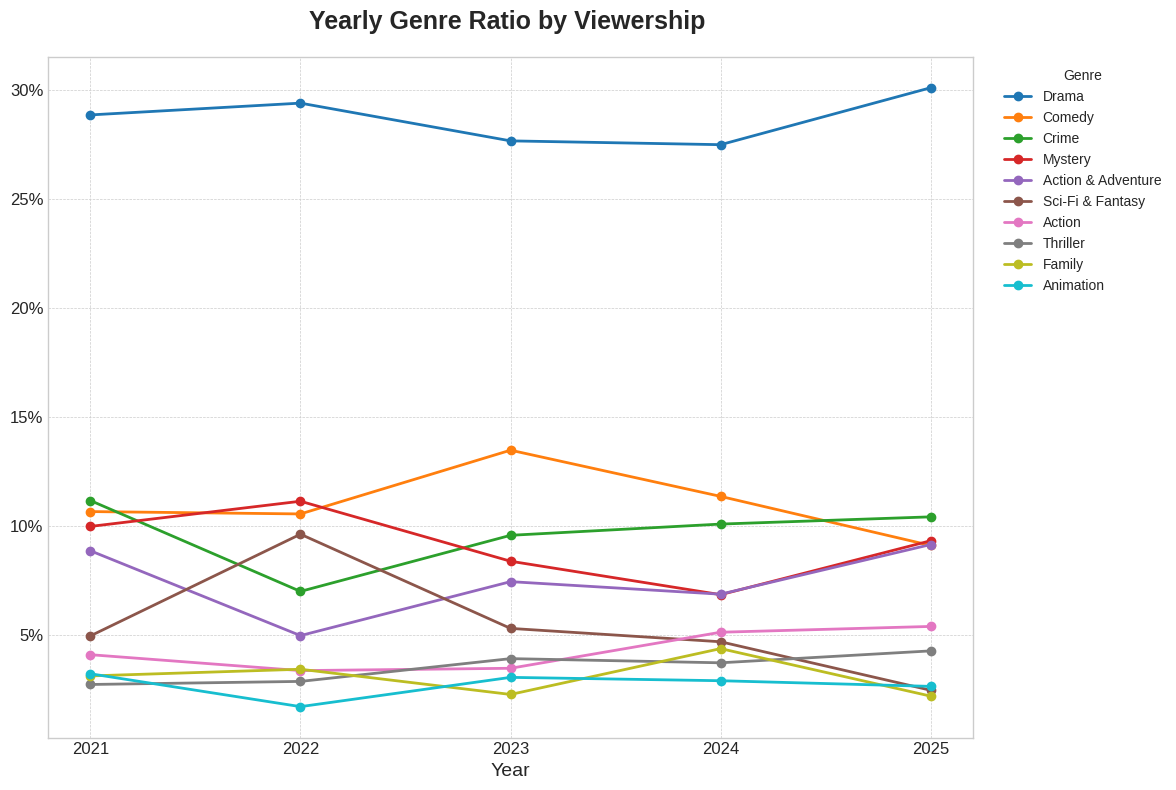


--- Ïó∞ÎèÑÎ≥Ñ 'Ï°∞ÌöåÏàò Í∞ÄÏ§ë Ïû•Î•¥ Ï†êÏú†Ïú®' (ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥ ÏÉòÌîå) ---
genres  Drama  Comedy  Crime  Mystery  Action & Adventure  Sci-Fi & Fantasy  Action  Thriller  Family  Animation
year                                                                                                            
2021   28.85%  10.68% 11.18%    9.99%               8.88%             4.98%   4.12%     2.75%   3.15%      3.25%
2022   29.39%  10.57%  7.02%   11.15%               4.99%             9.64%   3.39%     2.90%   3.45%      1.74%
2023   27.66%  13.49%  9.59%    8.40%               7.47%             5.32%   3.50%     3.94%   2.30%      3.08%
2024   27.48%  11.37% 10.10%    6.87%               6.89%             4.71%   5.15%     3.75%   4.40%      2.93%
2025   30.09%   9.12% 10.43%    9.34%               9.17%             2.49%   5.41%     4.29%   2.22%      2.67%


In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns # SeabornÏùÄ Ïä§ÌÉÄÏùº Îì±Ïóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏùå
import numpy as np

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

# Í∞Å ÏòÅÌôî/ÏáºÎ•º Ïû•Î•¥Î≥ÑÎ°ú Î∂ÑÎ¶¨ (explode). Ïù¥Îïå weekly_hours_viewedÎèÑ Ìï®Íªò Ïú†ÏßÄÎê©ÎãàÎã§.
df_exploded = df.explode('genres')

# --- 2. Ïó∞ÎèÑÎ≥Ñ "Ï°∞ÌöåÏàò Í∏∞Î∞ò" Ïû•Î•¥ ÎπÑÏú® Í≥ÑÏÇ∞ ---
print("--- 2. Ïó∞ÎèÑÎ≥Ñ 'Ï°∞ÌöåÏàò Í∏∞Î∞ò' Ïû•Î•¥ Ï†êÏú†Ïú® Í≥ÑÏÇ∞ Ï§ë ---")

genre_viewership = df_exploded.groupby(['year', 'genres'])['weekly_hours_viewed'].sum().reset_index(name='total_genre_viewership')
pivot_viewership_df = genre_viewership.pivot(index='year', columns='genres', values='total_genre_viewership').fillna(0)
total_viewership_tags_per_year = pivot_viewership_df.sum(axis=1)
ratio_viewership_df = pivot_viewership_df.div(total_viewership_tags_per_year, axis=0)
ratio_viewership_df = ratio_viewership_df.fillna(0)


# --- 3. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ ---
if ratio_viewership_df.empty:
    print("Ï°∞ÌöåÏàò Í∏∞Î∞ò Ïû•Î•¥ Ï†êÏú†Ïú®ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏóàÏäµÎãàÎã§. Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit()

# Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎèôÏïàÏùò ÌèâÍ∑† "Ï°∞ÌöåÏàò Í∏∞Î∞ò ÎπÑÏú®"ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥Î•º ÏÑ†Ï†ïÌï©ÎãàÎã§.
top_n = 10
top_genres = ratio_viewership_df.mean().nlargest(top_n).index

# ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥Ïùò Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉùÌï©ÎãàÎã§.
df_plot_line = ratio_viewership_df[top_genres].copy()


# --- 4. Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8)) # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ Ï°∞Ï†ï (ÎÑàÎπÑÎ•º Ï°∞Í∏à Îçî ÎÑìÍ≤å)

if df_plot_line.empty:
    ax.text(0.5, 0.5, "No data available for plotting.",
            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_title(f'Yearly Genre Share by Viewership (Top {top_n} Genres) - No Data', fontsize=16, fontweight='bold', pad=15)
else:
    # Í∞Å Ïû•Î•¥Î≥ÑÎ°ú Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
    for genre in df_plot_line.columns:
        ax.plot(df_plot_line.index, df_plot_line[genre], marker='o', linestyle='-', linewidth=2, label=genre)

    ax.set_title(f'Yearly Genre Ratio by Viewership ', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Year', fontsize=14)
    #ax.set_ylabel('Genre Share (Viewership Weighted)', fontsize=14)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='both', labelsize=12)

    # YÏ∂ï Î†àÏù¥Î∏îÏùÑ ÌçºÏÑºÌä∏(%) ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

    # XÏ∂ï ÎààÍ∏àÏùÑ Ï†ïÏàò Ïó∞ÎèÑÎ°ú Î™ÖÌôïÌïòÍ≤å ÌëúÏãú
    ax.set_xticks(df_plot_line.index.unique())


    ax.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Î≤îÎ°Ä Í≥µÍ∞Ñ ÌôïÎ≥¥
plt.show()

# --- 5. ÏÉàÎ°úÏö¥ ÎπÑÏú® Îç∞Ïù¥ÌÑ∞ ÏùºÎ∂Ä Ï∂úÎ†• (Ï∞∏Í≥†Ïö©) ---
print(f"\n--- Ïó∞ÎèÑÎ≥Ñ 'Ï°∞ÌöåÏàò Í∞ÄÏ§ë Ïû•Î•¥ Ï†êÏú†Ïú®' (ÏÉÅÏúÑ {top_n}Í∞ú Ïû•Î•¥ ÏÉòÌîå) ---")
if not df_plot_line.empty:
    print((df_plot_line.head() * 100).to_string(float_format='{:.2f}%'.format))
else:
    print("Ï∂úÎ†•Ìï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

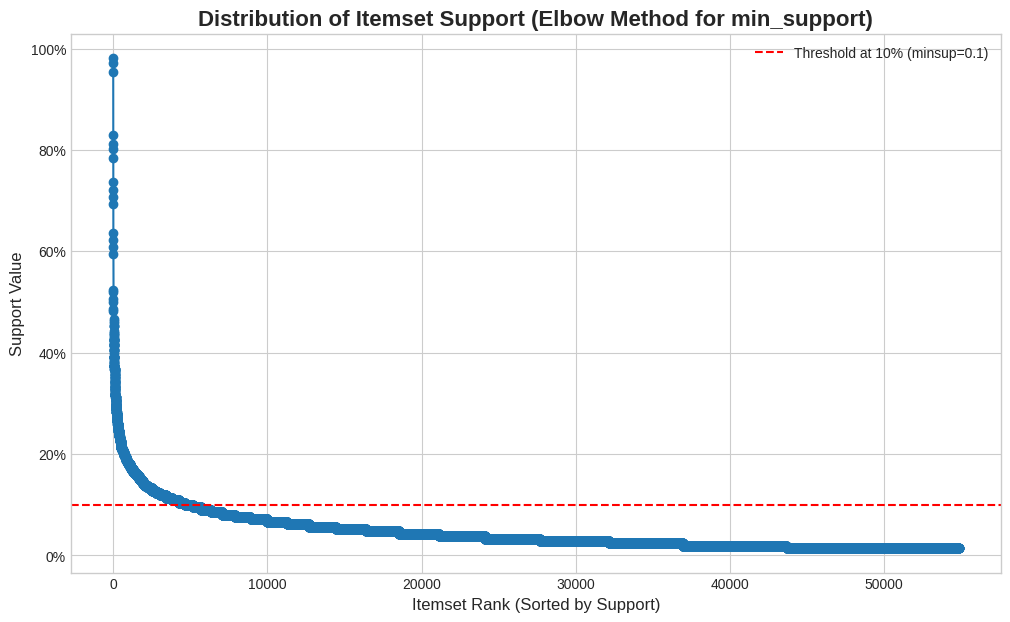

In [ ]:
import pandas as pd
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    exit()

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

# --- 2. ÌäπÏ†ï Ïó∞ÎèÑ(2023ÎÖÑ)Ïùò 'Ï£ºÍ∞Ñ Ïû•Î∞îÍµ¨Îãà' Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ---
df_2023 = df[df['year'] == 2023]
transactions = df_2023.groupby(['week', 'category'])['genres'].apply(np.sum).tolist()
transactions = [list(set(item)) for item in transactions if item]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

# --- 3. ÎÇÆÏùÄ min_supportÎ°ú Î™®Îì† Ï°∞Ìï©Ïùò ÏßÄÏßÄÎèÑ Í≥ÑÏÇ∞ ---
# "ÏµúÏÜå 1% Ïù¥ÏÉÅ Îì±Ïû•ÌïòÎäî Î™®Îì† Ï°∞Ìï©ÏùÑ Ï∞æÏïÑÏ§ò" -> Í∞ÄÎä•Ìïú ÎßéÏùÄ Ï°∞Ìï©ÏùÑ Î≥¥Í∏∞ ÏúÑÌï®
all_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)

# ÏßÄÏßÄÎèÑÍ∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
all_itemsets_sorted = all_itemsets.sort_values(by='support', ascending=False)
# ÏàúÏúÑÎ•º Îß§Í∏∞Í∏∞ ÏúÑÌïú 'rank' Ïª¨Îüº Ï∂îÍ∞Ä
all_itemsets_sorted['rank'] = np.arange(len(all_itemsets_sorted))

# --- 4. 'Elbow Method' Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(all_itemsets_sorted['rank'], all_itemsets_sorted['support'], marker='o', linestyle='-')

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
ax.set_title('Distribution of Itemset Support (Elbow Method for min_support)', fontsize=16, fontweight='bold')
ax.set_xlabel('Itemset Rank (Sorted by Support)', fontsize=12)
ax.set_ylabel('Support Value', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format)) # YÏ∂ïÏùÑ ÌçºÏÑºÌä∏Î°ú ÌëúÏãú

# Í∏∞Ï°¥Ïóê ÏÇ¨Ïö©ÌñàÎçò min_support=0.1(10%) ÏúÑÏπòÏóê Îπ®Í∞Ñ Ï†êÏÑ† Ï∂îÍ∞Ä
ax.axhline(y=0.1, color='r', linestyle='--', label='Threshold at 10% (minsup=0.1)')
ax.legend()

plt.grid(True)
plt.show()

In [ ]:
# 1. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
import pandas as pd
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import numpy as np

# --- 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

# --- 3. Ï†ÑÏ≤¥ Ïó∞ÎèÑÏóê ÎåÄÌï¥ Î∞òÎ≥µ Î∂ÑÏÑù ---
# Îç∞Ïù¥ÌÑ∞Ïóê ÏûàÎäî Î™®Îì† Ïó∞ÎèÑÎ•º Í∞ÄÏ†∏ÏôÄÏÑú Ï†ïÎ†¨
all_years = sorted(df['year'].unique())

for year in all_years:
    print(f"\n--- {year}ÎÖÑ, Ìï®Íªò Îì±Ïû•Ìïú ÎπàÎèÑ(ÏßÄÏßÄÎèÑ)Í∞Ä 15% Ïù¥ÏÉÅÏù∏ Îëê Ïû•Î•¥ Ï°∞Ìï©(A&B) Î™©Î°ù ---")

    # Ìï¥Îãπ Ïó∞ÎèÑÏùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
    df_year = df[df['year'] == year]

    # 'Ï£ºÍ∞Ñ Ïû•Î∞îÍµ¨Îãà' Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    transactions = df_year.groupby(['week', 'category'])['genres'].apply(np.sum).tolist()
    transactions = [list(set(item)) for item in transactions if item]

    if not transactions:
        print("Ìï¥Îãπ Ïó∞ÎèÑÏóê Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        continue

    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

    # AprioriÎ°ú ÏßÄÏßÄÎèÑ 10% Ïù¥ÏÉÅÏù∏ Ï°∞Ìï© Ï∞æÍ∏∞
    frequent_itemsets = apriori(df_onehot, min_support=0.15, use_colnames=True)

    # Í≤∞Í≥º Ï§ëÏóêÏÑú Ïû•Î•¥Í∞Ä 2Í∞úÏù∏ Ï°∞Ìï©(A&B)Îßå ÌïÑÌÑ∞ÎßÅ
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    results_df = frequent_itemsets[frequent_itemsets['length'] == 2]

    if results_df.empty:
        print("Ìï¥Îãπ Ïó∞ÎèÑÏóêÎäî ÏßÄÏßÄÎèÑ 15% Ïù¥ÏÉÅÏù∏ Îëê Ïû•Î•¥ Ï°∞Ìï©ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    else:
        # Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ†¨ Î∞è Ïª¨Îüº Ï†ïÎ¶¨
        results_df_sorted = results_df.sort_values(by='support', ascending=False)
        results_df_sorted['itemsets'] = results_df_sorted['itemsets'].apply(lambda x: ' & '.join(list(x)))
        final_df = results_df_sorted[['itemsets', 'support']]

        print(final_df.to_string(index=False))


--- 2021ÎÖÑ, Ìï®Íªò Îì±Ïû•Ìïú ÎπàÎèÑ(ÏßÄÏßÄÎèÑ)Í∞Ä 15% Ïù¥ÏÉÅÏù∏ Îëê Ïû•Î•¥ Ï°∞Ìï©(A&B) Î™©Î°ù ---
                             itemsets  support
                       Comedy & Drama 0.942308
                        Drama & Crime 0.798077
                       Comedy & Crime 0.769231
                       Drama & Family 0.711538
                      Comedy & Family 0.701923
                    Animation & Drama 0.625000
                   Animation & Comedy 0.605769
                       Family & Crime 0.596154
                      Drama & Mystery 0.538462
                     Comedy & Mystery 0.509615
                    Animation & Crime 0.500000
                   Animation & Family 0.490385
                       Drama & Action 0.471154
                      Comedy & Action 0.461538
                      Mystery & Crime 0.461538
                      Drama & Romance 0.451923
                     Action & Romance 0.442308
                   Action & Adventure 0.442308
       

In [ ]:
import pandas as pd
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import numpy as np

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
# Î¨∏ÏûêÏó¥ Î¶¨Ïä§Ìä∏Î•º Ïã§Ï†ú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df['genres'] = df['genres'].apply(ast.literal_eval)

# --- 2. Ïó∞ÎèÑÎ≥Ñ Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ÏÉùÏÑ± ---
all_results = []

# Îç∞Ïù¥ÌÑ∞Ïóê ÏûàÎäî Î™®Îì† Ïó∞ÎèÑÎ•º Í∞ÄÏ†∏ÏôÄÏÑú Ï†ïÎ†¨
all_years = sorted(df['year'].unique())

for year in all_years:
    # Ìï¥Îãπ Ïó∞ÎèÑÏùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
    df_year = df[df['year'] == year]

    # 'Ï£ºÍ∞Ñ Ïû•Î∞îÍµ¨Îãà' Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    transactions = df_year.groupby(['week', 'category'])['genres'].apply(np.sum).tolist()
    transactions = [list(set(item)) for item in transactions if item]

    if not transactions:
        continue

    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

    # AprioriÎ°ú ÏßÄÏßÄÎèÑ 15% Ïù¥ÏÉÅÏù∏ Ï°∞Ìï© Ï∞æÍ∏∞
    frequent_itemsets = apriori(df_onehot, min_support=0.15, use_colnames=True)

    if not frequent_itemsets.empty:
        # Í≤∞Í≥º Ï§ëÏóêÏÑú Ïû•Î•¥Í∞Ä 2Í∞úÏù∏ Ï°∞Ìï©Îßå ÌïÑÌÑ∞ÎßÅ
        frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
        results_df = frequent_itemsets[frequent_itemsets['length'] == 2].copy() # .copy() to avoid SettingWithCopyWarning

        # ÎÇòÏ§ëÏóê Í∑∏Î£πÌôîÌïòÍ∏∞ ÏúÑÌï¥ frozensetÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
        results_df['itemsets_str'] = results_df['itemsets'].apply(lambda x: ' & '.join(sorted(list(x))))
        results_df['year'] = year
        all_results.append(results_df[['year', 'itemsets_str', 'support']])

# --- 3. Ïö∞ÏÉÅÌñ• Ï°∞Ìï© Î∂ÑÏÑù ---
# Î™®Îì† Ïó∞ÎèÑÏùò Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞
if not all_results:
    print("Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
else:
    trends_df = pd.concat(all_results, ignore_index=True)

    # Ï∂îÏÑ∏ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Ìï®Ïàò Ï†ïÏùò (ÏÑ†Ìòï ÌöåÍ∑Ä Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞)
    def calculate_trend(series):
        # ÏµúÏÜå 3ÎÖÑ Ïù¥ÏÉÅ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå Ï∂îÏÑ∏ Í≥ÑÏÇ∞
        if len(series) < 3:
            return np.nan
        # Ïó∞ÎèÑÎ•º x, ÏßÄÏßÄÎèÑÎ•º yÎ°ú ÎÜìÍ≥† Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞
        x = series['year'].values
        y = series['support'].values
        # polyfit(x, y, 1)ÏùÄ 1Ï∞® Îã§Ìï≠Ïãù(ÏßÅÏÑ†)Ïùò Í≥ÑÏàòÎ•º Î∞òÌôò. [Í∏∞Ïö∏Í∏∞, yÏ†àÌé∏]
        slope, _ = np.polyfit(x, y, 1)
        return slope

    # Ïû•Î•¥ Ï°∞Ìï©Î≥ÑÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ Ï∂îÏÑ∏(Í∏∞Ïö∏Í∏∞) Í≥ÑÏÇ∞
    slopes = trends_df.groupby('itemsets_str').apply(calculate_trend)

    # Í∏∞Ïö∏Í∏∞Í∞Ä ÏñëÏàòÏù∏ 'Ïö∞ÏÉÅÌñ•' Ï°∞Ìï©Îßå ÌïÑÌÑ∞ÎßÅ
    upward_trends = slopes[slopes > 0].sort_values(ascending=False).reset_index(name='trend_slope')

    # --- 4. Í≤∞Í≥º Ï∂úÎ†• ---
    print("\n\n" + "="*60)
    print("üìà Ïó∞ÎèÑÎ≥Ñ Ïù∏Í∏∞Í∞Ä ÏÉÅÏäπÌïòÎäî 'Ïö∞ÏÉÅÌñ•' Ìä∏Î†åÎìú Ïû•Î•¥ Ï°∞Ìï©")
    print("="*60)
    print("(ÏµúÏÜå 3ÎÖÑ Ïù¥ÏÉÅ, ÏßÄÏßÄÎèÑ 15%Î•º ÎÑòÏùÄ Í∏∞Î°ùÏù¥ ÏûàÎäî Ï°∞Ìï©Îßå Î∂ÑÏÑù ÎåÄÏÉÅ)")

    if upward_trends.empty:
        print("\nÎ∂ÑÏÑù Í∏∞Í∞Ñ ÎèôÏïà Ïö∞ÏÉÅÌñ•ÌïòÎäî Ï∂îÏÑ∏Î•º Î≥¥Ïù¥Îäî Ï°∞Ìï©ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.")
    else:
        # Í∞Å Ï°∞Ìï©Ïùò Ïó∞ÎèÑÎ≥Ñ ÏßÄÏßÄÎèÑ Ï†ïÎ≥¥Î•º Ìï®Íªò Î≥¥Ïó¨Ï£ºÍ∏∞ ÏúÑÌïú Ï≤òÎ¶¨
        final_output = upward_trends.merge(
            trends_df.pivot(index='itemsets_str', columns='year', values='support'),
            on='itemsets_str'
        )
        # NaN Í∞íÏùÄ Ìï¥Îãπ Ïó∞ÎèÑÏóê 15%Î•º ÎÑòÏßÄ Î™ªÌñàÏùåÏùÑ ÏùòÎØ∏
        final_output = final_output.fillna('-')

        print("\n'trend_slope'Í∞Ä ÌÅ¥ÏàòÎ°ù ÏµúÍ∑º Ïù∏Í∏∞Í∞Ä Îçî Í∞ÄÌååÎ•¥Í≤å ÏÉÅÏäπÌïú Ï°∞Ìï©ÏûÖÎãàÎã§.\n")
        print(final_output.to_string(index=False))



üìà Ïó∞ÎèÑÎ≥Ñ Ïù∏Í∏∞Í∞Ä ÏÉÅÏäπÌïòÎäî 'Ïö∞ÏÉÅÌñ•' Ìä∏Î†åÎìú Ïû•Î•¥ Ï°∞Ìï©
(ÏµúÏÜå 3ÎÖÑ Ïù¥ÏÉÅ, ÏßÄÏßÄÎèÑ 15%Î•º ÎÑòÏùÄ Í∏∞Î°ùÏù¥ ÏûàÎäî Ï°∞Ìï©Îßå Î∂ÑÏÑù ÎåÄÏÉÅ)

'trend_slope'Í∞Ä ÌÅ¥ÏàòÎ°ù ÏµúÍ∑º Ïù∏Í∏∞Í∞Ä Îçî Í∞ÄÌååÎ•¥Í≤å ÏÉÅÏäπÌïú Ï°∞Ìï©ÏûÖÎãàÎã§.

                         itemsets_str  trend_slope      2021      2022     2023     2024      2025
                  Crime & Documentary     0.041953  0.240385  0.307692 0.344340 0.471154  0.368421
                 Comedy & Documentary     0.041245  0.221154  0.341346 0.424528 0.485577  0.355263
                 Documentary & Family     0.040865         -  0.216346 0.198113 0.298077         -
                  Documentary & Drama     0.036184  0.259615  0.370192 0.424528 0.514423  0.368421
                Documentary & Mystery     0.035805  0.153846  0.197115 0.297170 0.336538  0.263158
                   Mystery & Thriller     0.026442         -  0.173077 0.306604 0.225962         -
                     Action & Mystery     0.021635    

<ipython-input-28-677e17433dff>:73: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes = trends_df.groupby('itemsets_str').apply(calculate_trend)


In [ ]:
import pandas as pd
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import numpy as np

# --- 0. Ïù¥Ï†Ñ ÏΩîÎìú Ïã§Ìñâ (final_output Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±) ---
# Ïù¥ Î∂ÄÎ∂ÑÏùÄ ÏÇ¨Ïö©ÏûêÏùò Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùºÌïòÍ≤å final_outputÏùÑ ÏÉùÏÑ±ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.
# ÎßåÏïΩ Ïù¥ÎØ∏ final_output Î≥ÄÏàòÍ∞Ä ÏûàÎã§Î©¥ Ïù¥ Î∂ÄÎ∂ÑÏùÄ Í±¥ÎÑàÎõ∞Ïñ¥ÎèÑ Îê©ÎãàÎã§.

# --- 0.1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df_source = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df_source['week'] = pd.to_datetime(df_source['week'])
df_source['year'] = df_source['week'].dt.year
df_source['genres'] = df_source['genres'].apply(ast.literal_eval)

all_results_for_final_output = []
all_source_years = sorted(df_source['year'].unique())

for year_val in all_source_years:
    df_year_source = df_source[df_source['year'] == year_val]
    transactions_source = df_year_source.groupby(['week', 'category'])['genres'].apply(np.sum).tolist()
    transactions_source = [list(set(item)) for item in transactions_source if item]

    if not transactions_source:
        continue

    te_source = TransactionEncoder()
    te_ary_source = te_source.fit(transactions_source).transform(transactions_source)
    df_onehot_source = pd.DataFrame(te_ary_source, columns=te_source.columns_)

    frequent_itemsets_source = apriori(df_onehot_source, min_support=0.15, use_colnames=True)

    if not frequent_itemsets_source.empty:
        frequent_itemsets_source['length'] = frequent_itemsets_source['itemsets'].apply(lambda x: len(x))
        results_df_source = frequent_itemsets_source[frequent_itemsets_source['length'] == 2].copy()
        results_df_source['itemsets_str'] = results_df_source['itemsets'].apply(lambda x: ' & '.join(sorted(list(x))))
        results_df_source['year'] = year_val
        all_results_for_final_output.append(results_df_source[['year', 'itemsets_str', 'support']])

if not all_results_for_final_output:
    print("Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§. (final_output ÏÉùÏÑ± Î∂àÍ∞Ä)")
    final_output = pd.DataFrame() # Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï¥àÍ∏∞Ìôî
else:
    trends_df_for_final_output = pd.concat(all_results_for_final_output, ignore_index=True)

    def calculate_trend_for_final_output(series):
        if len(series) < 3:
            return np.nan
        x = series['year'].values
        y = series['support'].values
        slope, _ = np.polyfit(x, y, 1)
        return slope

    slopes_for_final_output = trends_df_for_final_output.groupby('itemsets_str').apply(calculate_trend_for_final_output)
    upward_trends_for_final_output = slopes_for_final_output[slopes_for_final_output > 0].sort_values(ascending=False).reset_index(name='trend_slope')

    if upward_trends_for_final_output.empty:
        print("Ïö∞ÏÉÅÌñ• Ìä∏Î†åÎìú Ï°∞Ìï©ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. (final_output ÏÉùÏÑ± Î∂àÍ∞Ä)")
        final_output = pd.DataFrame() # Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï¥àÍ∏∞Ìôî
    else:
        final_output = upward_trends_for_final_output.merge(
            trends_df_for_final_output.pivot(index='itemsets_str', columns='year', values='support'),
            on='itemsets_str'
        )
        # fillna('-')Îäî ÎßàÏßÄÎßâ Ï∂úÎ†• ÏãúÏóêÎßå ÌïòÍ≥†, Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Ïà´ÏûêÌòï(NaN)ÏúºÎ°ú Ïú†ÏßÄ
        # final_output = final_output.fillna('-') # ÏùºÎã® Ï£ºÏÑù Ï≤òÎ¶¨

# --- Ïó¨Í∏∞ÍπåÏßÄ final_output ÏÉùÏÑ± Í≥ºÏ†ï ---

# ÎßåÏïΩ final_outputÏù¥ Ïù¥Ï†Ñ Ïã§ÌñâÏóêÏÑú Ïù¥ÎØ∏ ÏÉùÏÑ±ÎêòÏñ¥ ÏûàÎã§Î©¥, ÏúÑÏùò ÏΩîÎìúÎäî ÌïÑÏöî ÏóÜÏäµÎãàÎã§.
# ÏòàÏãú: ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†úÍ≥µÌïú ÌÖçÏä§Ìä∏ Ï∂úÎ†•ÏùÑ DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Í≤ΩÏö∞ (Ïã§Ï†úÎ°úÎäî ÏúÑ ÏΩîÎìú ÏÇ¨Ïö© Í∂åÏû•)
# data_from_user_text = {
#     'itemsets_str': ['Crime & Documentary', 'Comedy & Documentary', ...],
#     'trend_slope': [0.041953, 0.041245, ...],
#     2021: [0.240385, 0.221154, ...],
#     ...
# }
# final_output = pd.DataFrame(data_from_user_text)


if final_output.empty:
    print("Î∂ÑÏÑùÌï† 'final_output' Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. Ïù¥Ï†Ñ Îã®Í≥ÑÏùò ÏΩîÎìú Ïã§ÌñâÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
else:
    # Ïó∞ÎèÑ Ïª¨Îüº Ï†ïÏùò (Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ïã§Ï†ú Ïó∞ÎèÑ Î™©Î°ùÏùÑ ÌôïÏù∏Ìï¥Ïïº Ìï®)
    # Ïã§Ï†ú final_outputÏóê ÏûàÎäî Ïó∞ÎèÑ Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    year_columns = [col for col in final_output.columns if isinstance(col, int) and 2020 < col < 2030]
    year_columns.sort()

    # Î∂ÑÏÑùÏùò Ìé∏ÏùòÎ•º ÏúÑÌï¥ '-'Î•º np.nanÏúºÎ°ú Î≥ÄÌôò (Ïù¥ÎØ∏ Ïà´ÏûêÌòï NaNÏùº Ïàò ÏûàÏùå)
    for year_col in year_columns:
        if year_col in final_output.columns:
            final_output[year_col] = pd.to_numeric(final_output[year_col], errors='coerce')


    # --- 2. 'Í∏âÎ∂ÄÏÉÅ' Ï°∞Ìï© ÌÉêÏÉâ (Breakout Hits / Emerging Trends) ---
    print("\n\n" + "="*60)
    print("üìà 2. 'Í∏âÎ∂ÄÏÉÅ' Ìä∏Î†åÎìú Ïû•Î•¥ Ï°∞Ìï©")
    print("="*60)
    print("(Ï¥àÍ∏∞ Ïó∞ÎèÑ(Ïòà: 2021ÎÖÑ) ÏßÄÏßÄÎèÑ < 20%, ÏµúÏã† Ïó∞ÎèÑ(Ïòà: 2025ÎÖÑ) ÏßÄÏßÄÎèÑ >= 30%)")

    # Í∏∞Ï§Ä ÏÑ§Ï†ï
    initial_year_col = year_columns[0] if year_columns else None # Ïòà: 2021
    latest_year_col = year_columns[-1] if year_columns else None # Ïòà: 2025

    initial_support_threshold = 0.20
    latest_support_threshold = 0.30

    breakout_hits = pd.DataFrame() # Ï¥àÍ∏∞Ìôî

    if initial_year_col and latest_year_col and initial_year_col in final_output.columns and latest_year_col in final_output.columns:
        # NaNÏùÑ 0ÏúºÎ°ú Ï≤òÎ¶¨ÌïòÏó¨ Ï°∞Í±¥ ÎπÑÍµê (ÏßÄÏßÄÎèÑ ÏóÜÏùåÏùÑ 0ÏúºÎ°ú Í∞ÑÏ£º)
        condition_initial = final_output[initial_year_col].fillna(0) < initial_support_threshold
        condition_latest = final_output[latest_year_col].fillna(0) >= latest_support_threshold

        breakout_hits = final_output[condition_initial & condition_latest].sort_values(by='trend_slope', ascending=False)

    if breakout_hits.empty:
        print("\nÏ°∞Í±¥Ïóê ÎßûÎäî 'Í∏âÎ∂ÄÏÉÅ' Ï°∞Ìï©ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.")
    else:
        print(breakout_hits.fillna('-').to_string(index=False))


    # --- 3. ÏÉÅÏäπÏÑ∏Ïùò 'Íæ∏Ï§ÄÌï®' Î∂ÑÏÑù (Consistency of Rise) ---
    print("\n\n" + "="*60)
    print("üìä 3. ÏÉÅÏäπÏÑ∏Ïùò 'Íæ∏Ï§ÄÌï®' Î∂ÑÏÑù (Ïó∞ÏÜç ÏÉÅÏäπ ÌöüÏàò)")
    print("="*60)

    consistency_data = []
    if year_columns and len(year_columns) > 1: # ÏµúÏÜå 2Í∞úÎÖÑÏùÄ ÏûàÏñ¥Ïïº ÎπÑÍµê Í∞ÄÎä•
        for index, row in final_output.iterrows():
            increases = 0
            valid_comparisons = 0
            # year_columnsÎäî Ï†ïÎ†¨ÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï (Ïòà: [2021, 2022, 2023, 2024, 2025])
            for i in range(len(year_columns) - 1):
                prev_year_support = row[year_columns[i]]
                curr_year_support = row[year_columns[i+1]]

                # Îëê Ìï¥ Î™®Îëê Ïú†Ìö®Ìïú ÏßÄÏßÄÎèÑ Í∞íÏù¥ ÏûàÏùÑ ÎïåÎßå ÎπÑÍµê
                if pd.notna(prev_year_support) and pd.notna(curr_year_support):
                    valid_comparisons +=1
                    if curr_year_support > prev_year_support:
                        increases += 1

            # ÏµúÏÜå 2Î≤àÏùò Ïú†Ìö®Ìïú Ïó∞Í∞Ñ ÎπÑÍµêÍ∞Ä Í∞ÄÎä•Ìïú Í≤ΩÏö∞Îßå 'Íæ∏Ï§ÄÌï®' Ï†êÏàò Î∂ÄÏó¨
            # (Ïòà: 3Í∞úÎÖÑ Îç∞Ïù¥ÌÑ∞ -> 2Î≤à ÎπÑÍµê, 5Í∞úÎÖÑ Îç∞Ïù¥ÌÑ∞ -> 4Î≤à ÎπÑÍµê)
            if valid_comparisons >= min(2, len(year_columns) -2 ): # ÏµúÏÜå ÎπÑÍµê ÌöüÏàò Ï°∞Í±¥ Ï∂îÍ∞Ä Í∞ÄÎä•
                 consistency_data.append({
                    'itemsets_str': row['itemsets_str'],
                    'trend_slope': row['trend_slope'],
                    'consistent_increases': increases, # ÏàúÏàò Ï¶ùÍ∞Ä ÌöüÏàò
                    'total_comparisons': len(year_columns) -1, # Í∞ÄÎä•Ìïú Ï¥ù ÎπÑÍµê ÌöüÏàò
                    'increase_ratio': increases / (len(year_columns) -1 ) if (len(year_columns) -1) > 0 else 0
                    # Ïó∞ÎèÑÎ≥Ñ ÏßÄÏßÄÎèÑÎ•º Îã§Ïãú Ï∂îÍ∞ÄÌïòÏó¨ Ìï®Íªò Î≥º Ïàò ÏûàÎèÑÎ°ù Ìï®
                    **{year: row[year] for year in year_columns}
                })


    if not consistency_data:
        print("\n'Íæ∏Ï§ÄÌï®' Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÍ±∞ÎÇò, Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ï°∞Ìï©Ïù¥ ÏóÜÏäµÎãàÎã§.")
    else:
        consistent_trends_df = pd.DataFrame(consistency_data)
        # Íæ∏Ï§ÄÌïú ÏÉÅÏäπ ÎπÑÏú®Í≥º, trend_slope ÏàúÏúºÎ°ú Ï†ïÎ†¨
        consistent_trends_df = consistent_trends_df.sort_values(by=['increase_ratio', 'trend_slope'], ascending=[False, False])

        print(consistent_trends_df.fillna('-').to_string(index=False))



üìà 2. 'Í∏âÎ∂ÄÏÉÅ' Ìä∏Î†åÎìú Ïû•Î•¥ Ï°∞Ìï©
(Ï¥àÍ∏∞ Ïó∞ÎèÑ(Ïòà: 2021ÎÖÑ) ÏßÄÏßÄÎèÑ < 20%, ÏµúÏã† Ïó∞ÎèÑ(Ïòà: 2025ÎÖÑ) ÏßÄÏßÄÎèÑ >= 30%)

Ï°∞Í±¥Ïóê ÎßûÎäî 'Í∏âÎ∂ÄÏÉÅ' Ï°∞Ìï©ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§.


üìä 3. ÏÉÅÏäπÏÑ∏Ïùò 'Íæ∏Ï§ÄÌï®' Î∂ÑÏÑù (Ïó∞ÏÜç ÏÉÅÏäπ ÌöüÏàò)
                         itemsets_str  trend_slope  consistent_increases  total_comparisons  increase_ratio
                    Action & Thriller     0.016852                     4                  4            1.00
                  Crime & Documentary     0.041953                     3                  4            0.75
                 Comedy & Documentary     0.041245                     3                  4            0.75
                  Documentary & Drama     0.036184                     3                  4            0.75
                Documentary & Mystery     0.035805                     3                  4            0.75
                     Crime & Thriller     0.019332                     3             

<ipython-input-3-44294df80cd1>:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes_for_final_output = trends_df_for_final_output.groupby('itemsets_str').apply(calculate_trend_for_final_output)


In [ ]:
import pandas as pd
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import numpy as np
from collections import Counter

# --- 0. Ïù¥Ï†Ñ ÏΩîÎìú Ïã§Ìñâ (consistent_trends_df Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±) ---
# Ïù¥ Î∂ÄÎ∂ÑÏùÄ ÏÇ¨Ïö©ÏûêÏùò Ïù¥Ï†Ñ ÏΩîÎìúÏôÄ ÎèôÏùºÌïòÍ≤å consistent_trends_dfÎ•º ÏÉùÏÑ±ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.
# ÎßåÏïΩ Ïù¥ÎØ∏ consistent_trends_df Î≥ÄÏàòÍ∞Ä ÏûàÎã§Î©¥ Ïù¥ Î∂ÄÎ∂ÑÏùÄ Í±¥ÎÑàÎõ∞Ïñ¥ÎèÑ Îê©ÎãàÎã§.

# --- 0.1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df_source = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df_source['week'] = pd.to_datetime(df_source['week'])
df_source['year'] = df_source['week'].dt.year
df_source['genres'] = df_source['genres'].apply(ast.literal_eval)

all_results_for_final_output = []
all_source_years = sorted(df_source['year'].unique())

for year_val in all_source_years:
    df_year_source = df_source[df_source['year'] == year_val]
    transactions_source = df_year_source.groupby(['week', 'category'])['genres'].apply(np.sum).tolist()
    transactions_source = [list(set(item)) for item in transactions_source if item]

    if not transactions_source:
        continue

    te_source = TransactionEncoder()
    te_ary_source = te_source.fit(transactions_source).transform(transactions_source)
    df_onehot_source = pd.DataFrame(te_ary_source, columns=te_source.columns_)

    frequent_itemsets_source = apriori(df_onehot_source, min_support=0.15, use_colnames=True)

    if not frequent_itemsets_source.empty:
        frequent_itemsets_source['length'] = frequent_itemsets_source['itemsets'].apply(lambda x: len(x))
        results_df_source = frequent_itemsets_source[frequent_itemsets_source['length'] == 2].copy()
        results_df_source['itemsets_str'] = results_df_source['itemsets'].apply(lambda x: ' & '.join(sorted(list(x))))
        results_df_source['year'] = year_val
        all_results_for_final_output.append(results_df_source[['year', 'itemsets_str', 'support']])

final_output = pd.DataFrame() # Ï¥àÍ∏∞Ìôî
consistent_trends_df = pd.DataFrame() # Ï¥àÍ∏∞Ìôî

if not all_results_for_final_output:
    print("Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏäµÎãàÎã§. (final_output ÏÉùÏÑ± Î∂àÍ∞Ä)")
else:
    trends_df_for_final_output = pd.concat(all_results_for_final_output, ignore_index=True)

    def calculate_trend_for_final_output(series):
        if len(series) < 3:
            return np.nan
        x = series['year'].values
        y = series['support'].values
        slope, _ = np.polyfit(x, y, 1)
        return slope

    slopes_for_final_output = trends_df_for_final_output.groupby('itemsets_str').apply(calculate_trend_for_final_output)
    upward_trends_for_final_output = slopes_for_final_output[slopes_for_final_output > 0].sort_values(ascending=False).reset_index(name='trend_slope')

    if upward_trends_for_final_output.empty:
        print("Ïö∞ÏÉÅÌñ• Ìä∏Î†åÎìú Ï°∞Ìï©ÏùÑ Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. (final_output ÏÉùÏÑ± Î∂àÍ∞Ä)")
    else:
        final_output = upward_trends_for_final_output.merge(
            trends_df_for_final_output.pivot(index='itemsets_str', columns='year', values='support'),
            on='itemsets_str'
        )
        year_columns = [col for col in final_output.columns if isinstance(col, int) and 2020 < col < 2030]
        year_columns.sort()
        for year_col in year_columns:
            if year_col in final_output.columns:
                final_output[year_col] = pd.to_numeric(final_output[year_col], errors='coerce')

        # --- 3. ÏÉÅÏäπÏÑ∏Ïùò 'Íæ∏Ï§ÄÌï®' Î∂ÑÏÑù ÏΩîÎìú Î∂ÄÎ∂Ñ (consistent_trends_df ÏÉùÏÑ±) ---
        consistency_data = []
        if year_columns and len(year_columns) > 1:
            for index, row in final_output.iterrows():
                increases = 0
                valid_comparisons = 0
                for i in range(len(year_columns) - 1):
                    prev_year_support = row[year_columns[i]]
                    curr_year_support = row[year_columns[i+1]]
                    if pd.notna(prev_year_support) and pd.notna(curr_year_support):
                        valid_comparisons +=1
                        if curr_year_support > prev_year_support:
                            increases += 1
                if valid_comparisons >= min(2, len(year_columns) -2):
                     consistency_data.append({
                        'itemsets_str': row['itemsets_str'],
                        'trend_slope': row['trend_slope'],
                        'consistent_increases': increases,
                        'total_comparisons': len(year_columns) -1,
                        'increase_ratio': increases / (len(year_columns) -1 ) if (len(year_columns) -1) > 0 else 0,
                        **{year: row[year] for year in year_columns} # Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Ìè¨Ìï®
                    })
        if consistency_data:
            consistent_trends_df = pd.DataFrame(consistency_data)
            consistent_trends_df = consistent_trends_df.sort_values(by=['increase_ratio', 'trend_slope'], ascending=[False, False])
            # print("\n\n" + "="*60)
            # print("üìä 3. ÏÉÅÏäπÏÑ∏Ïùò 'Íæ∏Ï§ÄÌï®' Î∂ÑÏÑù (Ïó∞ÏÜç ÏÉÅÏäπ ÌöüÏàò) - Í≤∞Í≥º ÌÖåÏù¥Î∏î")
            # print("="*60)
            # print(consistent_trends_df.fillna('-').to_string(index=False)) # Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú Ï∂úÎ†•ÌïòÎçò Î∂ÄÎ∂Ñ
        else:
            print("\n'Íæ∏Ï§ÄÌï®' Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÍ±∞ÎÇò, Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ï°∞Ìï©Ïù¥ ÏóÜÏäµÎãàÎã§. (consistent_trends_df ÏÉùÏÑ± Î∂àÍ∞Ä)")


# --- Ïó¨Í∏∞ÏÑúÎ∂ÄÌÑ∞ "Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Ïû•Î•¥" Î∂ÑÏÑù ÏãúÏûë ---
if consistent_trends_df.empty:
    print("\n'consistent_trends_df'Í∞Ä ÎπÑÏñ¥ ÏûàÏñ¥ Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Ïû•Î•¥Î•º Î∂ÑÏÑùÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    print("Ïù¥Ï†Ñ Îã®Í≥ÑÏóêÏÑú 'ÏÉÅÏäπÏÑ∏Ïùò Íæ∏Ï§ÄÌï® Î∂ÑÏÑù' Í≤∞Í≥ºÍ∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏÉùÏÑ±ÎêòÏóàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
else:
    all_genres_list = []
    # 'itemsets_str' Ïª¨ÎüºÏóêÏÑú Í∞Å Ïû•Î•¥ Ï°∞Ìï© Î¨∏ÏûêÏó¥ÏùÑ Í∞ÄÏ†∏ÏôÄ Î∂ÑÎ¶¨
    for itemset_string in consistent_trends_df['itemsets_str']:
        genres_in_itemset = itemset_string.split(' & ')
        all_genres_list.extend(genres_in_itemset)

    # Í∞Å Ïû•Î•¥Ïùò Îì±Ïû• ÌöüÏàò Í≥ÑÏÇ∞
    genre_counts = Counter(all_genres_list)

    # Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Ïû•Î•¥ÏôÄ Í∑∏ ÌöüÏàò Ï∞æÍ∏∞
    most_common_genres = genre_counts.most_common()

    print("\n\n" + "="*60)
    print("üìä 'ÏÉÅÏäπÏÑ∏Ïùò Íæ∏Ï§ÄÌï® Î∂ÑÏÑù' Í≤∞Í≥ºÌëúÏóêÏÑú Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Ïû•Î•¥")
    print("="*60)

    if not most_common_genres:
        print("Î∂ÑÏÑùÎêú Ïû•Î•¥Í∞Ä ÏóÜÏäµÎãàÎã§.")
    else:
        print("ÏïÑÎûòÎäî Ìï¥Îãπ ÌëúÏóê Îì±Ïû•Ìïú Î™®Îì† Ïû•Î•¥ÏôÄ Í∞Å Ïû•Î•¥Ïùò Îì±Ïû• ÌöüÏàòÏûÖÎãàÎã§:")
        for genre, count in most_common_genres:
            print(f"- {genre}: {count}Ìöå")

        # Í∞ÄÏû• ÎÜíÏùÄ ÎπàÎèÑÏàòÎ•º Í∞ÄÏßÑ Ïû•Î•¥(Îì§)Îßå Îî∞Î°ú Î™ÖÏãú
        max_count = most_common_genres[0][1]
        top_genres = [genre for genre, count in most_common_genres if count == max_count]

        print("\nüëë Ïù¥ Ï§ë Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•Ìïú Ïû•Î•¥(Îì§):")
        for genre in top_genres:
            print(f"- {genre} (Ï¥ù {max_count}Ìöå)")



üìä 'ÏÉÅÏäπÏÑ∏Ïùò Íæ∏Ï§ÄÌï® Î∂ÑÏÑù' Í≤∞Í≥ºÌëúÏóêÏÑú Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•ÌïòÎäî Ïû•Î•¥
ÏïÑÎûòÎäî Ìï¥Îãπ ÌëúÏóê Îì±Ïû•Ìïú Î™®Îì† Ïû•Î•¥ÏôÄ Í∞Å Ïû•Î•¥Ïùò Îì±Ïû• ÌöüÏàòÏûÖÎãàÎã§:
- Action: 12Ìöå
- Crime: 11Ìöå
- Comedy: 10Ìöå
- Adventure: 10Ìöå
- Mystery: 9Ìöå
- Thriller: 8Ìöå
- Documentary: 8Ìöå
- Drama: 8Ìöå
- Science Fiction: 8Ìöå
- Animation: 6Ìöå
- Reality: 3Ìöå
- History: 3Ìöå
- Family: 3Ìöå
- Sci-Fi: 2Ìöå
- Fantasy: 2Ìöå
- Horror: 2Ìöå
- Romance: 1Ìöå

üëë Ïù¥ Ï§ë Í∞ÄÏû• ÏûêÏ£º Îì±Ïû•Ìïú Ïû•Î•¥(Îì§):
- Action (Ï¥ù 12Ìöå)


<ipython-input-4-d91feaa9edfd>:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes_for_final_output = trends_df_for_final_output.groupby('itemsets_str').apply(calculate_trend_for_final_output)


--- Apriori Î∂ÑÏÑùÏúºÎ°ú ÎπàÎ≤àÌïú Ïû•Î•¥ Ï°∞Ìï© ÌõÑÎ≥¥Íµ∞ Ï∂îÏ∂ú Ï§ë ---
--- ÏÉàÎ°úÏö¥ YÏ∂ï ÎπÑÏú®('Ïä¨Î°Ø Ï†êÏú†Ïú®') Í≥ÑÏÇ∞ Ï§ë ---
--- ÏµúÏ¢Ö Î∂ÑÏÑù ÎåÄÏÉÅ ÏÉÅÏúÑ 7Í∞ú Ïû•Î•¥ Ï°∞Ìï© (ÏÑ†Ï†ï Í∏∞Ï§Ä: ÏÉàÎ°úÏö¥ 'Ïä¨Î°Ø Ï†êÏú†Ïú®' ÌèâÍ∑†): ['Crime & Drama', 'Comedy & Drama', 'Drama & Mystery', 'Comedy & Family', 'Animation & Comedy', 'Action & Thriller', 'Animation & Family'] ---

--- ÏãúÍ∞ÅÌôî 1: Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ (YÏ∂ï: Ïä¨Î°Ø Ï†êÏú†Ïú®) ---


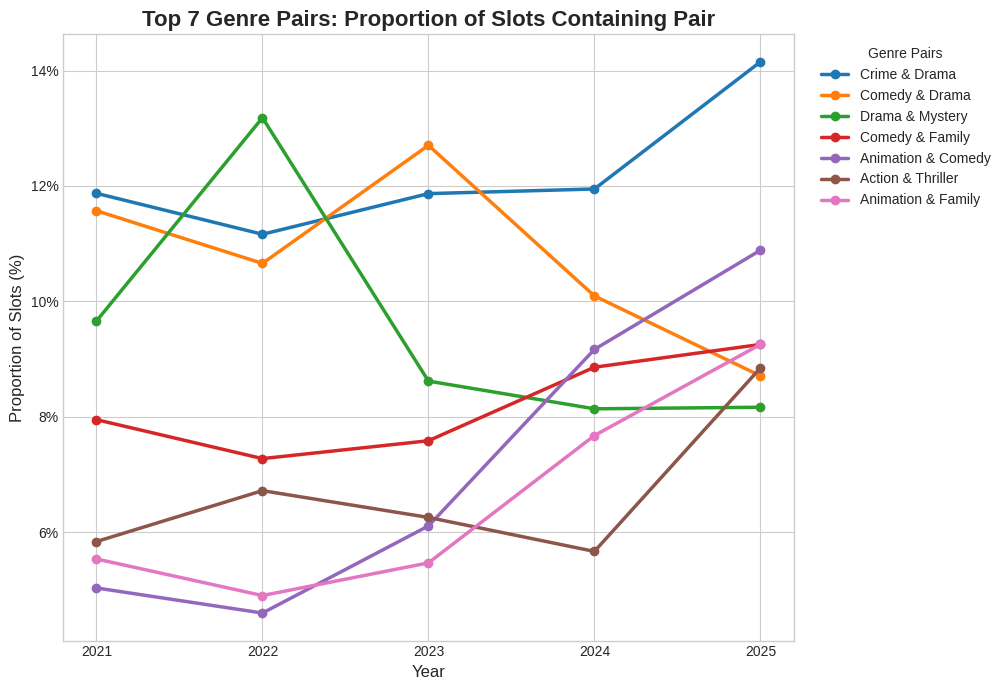


--- ÏãúÍ∞ÅÌôî 2: ÌûàÌä∏Îßµ (YÏ∂ï: Ïä¨Î°Ø Ï†êÏú†Ïú®) ---


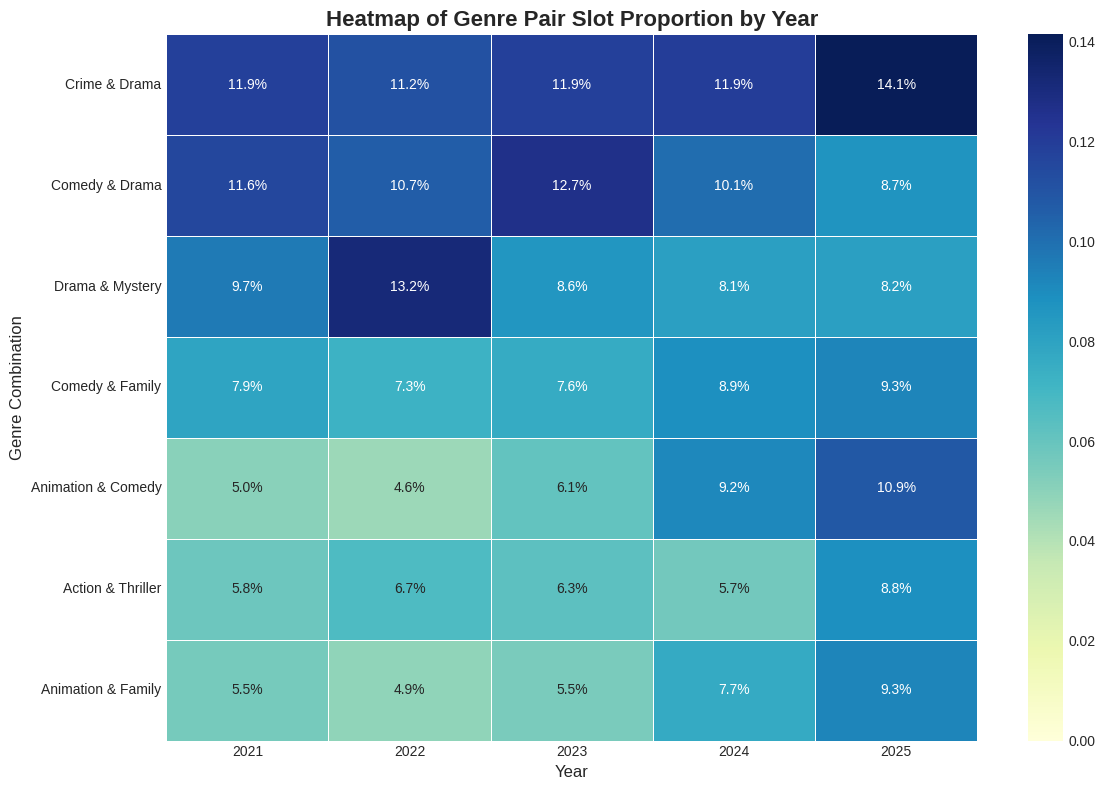

In [ ]:
import pandas as pd
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres_list_column'] = df['genres'].apply(ast.literal_eval) # Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤ΩÌïòÏó¨ Î™ÖÌôïÌôî

# --- 2. Apriori Î∂ÑÏÑùÏùÑ ÏúÑÌïú Ïó∞ÎèÑÎ≥Ñ Ìä∏ÎûúÏû≠ÏÖò ÏÉùÏÑ± Î∞è Î™®Îì† ÎπàÎ≤àÌïú ÏïÑÏù¥ÌÖúÏÖã Ï∂îÏ∂ú ---
all_frequent_itemsets_from_apriori = []
all_years = sorted(df['year'].unique())
print("--- Apriori Î∂ÑÏÑùÏúºÎ°ú ÎπàÎ≤àÌïú Ïû•Î•¥ Ï°∞Ìï© ÌõÑÎ≥¥Íµ∞ Ï∂îÏ∂ú Ï§ë ---")

for year in all_years:
    df_year_for_apriori = df[df['year'] == year]

    # Ìä∏ÎûúÏû≠ÏÖò ÏÉùÏÑ±: Í∞Å (week, category) Í∑∏Î£π ÎÇ¥ Î™®Îì† ÏûëÌíàÎì§Ïùò Ïû•Î•¥Îì§ÏùÑ Ìï©ÏπòÍ≥†, Í≥†Ïú† Ïû•Î•¥Îßå Ï∂îÏ∂ú
    transactions_for_apriori = []
    for _, group in df_year_for_apriori.groupby(['week', 'category']):
        genres_in_group_for_apriori = set()
        for genres_list_per_show in group['genres_list_column']: # ÏàòÏ†ïÎêú Ïª¨ÎüºÎ™Ö ÏÇ¨Ïö©
            for genre_item in genres_list_per_show:
                genres_in_group_for_apriori.add(genre_item)
        if genres_in_group_for_apriori: # Í∑∏Î£π ÎÇ¥Ïóê Ïû•Î•¥Í∞Ä ÌïòÎÇòÎùºÎèÑ ÏûàÏúºÎ©¥
            transactions_for_apriori.append(list(genres_in_group_for_apriori))

    if not transactions_for_apriori: continue

    te = TransactionEncoder()
    te_ary = te.fit(transactions_for_apriori).transform(transactions_for_apriori)
    df_onehot = pd.DataFrame(te_ary, columns=te.columns_) # te.columns_Ïóê Ïã§Ï†ú Ïû•Î•¥ Ïù¥Î¶ÑÏù¥ Îì§Ïñ¥Í∞ÄÏïº Ìï®

    # print(f"Year {year} te.columns_: {te.columns_[:10]}") # Ïû•Î•¥Î™Ö ÌôïÏù∏ (ÎîîÎ≤ÑÍπÖÏö©)

    if df_onehot.empty or len(df_onehot.columns) == 0: continue # ÏõêÌï´ Ïù∏ÏΩîÎî© Í≤∞Í≥ºÍ∞Ä ÎπÑÏóàÏúºÎ©¥ Í±¥ÎÑàÎõ∞Í∏∞

    frequent_itemsets_apriori = apriori(df_onehot, min_support=0.1, use_colnames=True) # min_supportÎäî Ïú†ÏßÄ

    if not frequent_itemsets_apriori.empty:
        frequent_itemsets_apriori['year'] = year
        all_frequent_itemsets_from_apriori.append(frequent_itemsets_apriori)

if not all_frequent_itemsets_from_apriori:
    print("Apriori Î∂ÑÏÑù Í≤∞Í≥º ÎπàÎ≤àÌïú ÏïÑÏù¥ÌÖúÏÖãÏù¥ ÏóÜÏäµÎãàÎã§. Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit()

# Apriori Í≤∞Í≥ºÏóêÏÑú Ïû•Î•¥ ÏåçÎßå Ï∂îÏ∂ú
trends_df_apriori = pd.concat(all_frequent_itemsets_from_apriori)
trends_df_apriori['itemset_str'] = trends_df_apriori['itemsets'].apply(lambda x: ' & '.join(sorted(list(x))))
all_apriori_pairs_df = trends_df_apriori[trends_df_apriori['itemsets'].apply(len) == 2].copy()
unique_apriori_pairs_frozensets = all_apriori_pairs_df['itemsets'].unique() # Î™®Îì† ÎπàÎ≤àÌïú Ïåç (frozenset)

# --- 3. ÏÉàÎ°úÏö¥ YÏ∂ï ÎπÑÏú® Í≥ÑÏÇ∞ (Î™®Îì† Apriori ÎπàÎ≤àÌïú ÏåçÏóê ÎåÄÌï¥) ---
print("--- ÏÉàÎ°úÏö¥ YÏ∂ï ÎπÑÏú®('Ïä¨Î°Ø Ï†êÏú†Ïú®') Í≥ÑÏÇ∞ Ï§ë ---")
new_metric_results = []
yearly_total_slots = df.groupby('year').size()

for year_val_metric in all_years:
    df_current_year_original = df[df['year'] == year_val_metric]
    current_year_total_slots = yearly_total_slots.get(year_val_metric, 0)

    if current_year_total_slots == 0: continue

    for itemset_fs in unique_apriori_pairs_frozensets:
        genres_in_pair = list(itemset_fs)
        # itemset_fsÍ∞Ä Ïã§Ï†ú Ïû•Î•¥ Ïù¥Î¶Ñ Î¨∏ÏûêÏó¥ÏùÑ Ìè¨Ìï®ÌïòÍ≥† ÏûàÎäîÏßÄ Ïó¨Í∏∞ÏÑú ÌôïÏù∏ Í∞ÄÎä•
        # print(f"Processing pair: {genres_in_pair}")
        if len(genres_in_pair) != 2: continue

        # Î™®Îì† Ïû•Î•¥ Ïù¥Î¶ÑÏù¥ Î¨∏ÏûêÏó¥Ïù∏ÏßÄ, Í∏∏Ïù¥Í∞Ä Ï†ÅÏ†àÌïúÏßÄ Ï∂îÍ∞Ä ÌôïÏù∏ (ÎîîÎ≤ÑÍπÖÏö©)
        # if not (isinstance(genres_in_pair[0], str) and isinstance(genres_in_pair[1], str) and \
        # len(genres_in_pair[0]) > 1 and len(genres_in_pair[1]) > 1):
        # print(f"Suspicious genre names in pair: {genres_in_pair}")
        # continue


        g1, g2 = genres_in_pair[0], genres_in_pair[1]

        pair_slot_count = 0
        for genres_list_per_slot in df_current_year_original['genres_list_column']: # ÏàòÏ†ïÎêú Ïª¨ÎüºÎ™Ö
            if g1 in genres_list_per_slot and g2 in genres_list_per_slot:
                pair_slot_count += 1

        new_metric_value = pair_slot_count / current_year_total_slots if current_year_total_slots > 0 else 0
        itemset_str_key = ' & '.join(sorted(genres_in_pair)) # ÏùºÍ¥ÄÎêú Î¨∏ÏûêÏó¥ ÌÇ§ ÏÉùÏÑ±
        new_metric_results.append({'year': year_val_metric,
                                   'itemset_str': itemset_str_key,
                                   'new_metric': new_metric_value})

if not new_metric_results:
    print("ÏÉàÎ°úÏö¥ ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit()

df_new_metric_all_pairs = pd.DataFrame(new_metric_results)
pivot_df_all_pairs_new_metric = df_new_metric_all_pairs.pivot(index='year', columns='itemset_str', values='new_metric').fillna(0)

# --- 4. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ (ÏÉàÎ°úÏö¥ ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 7Í∞ú ÏÑ†Ï†ï) ---
if pivot_df_all_pairs_new_metric.empty:
    print("ÏÉàÎ°úÏö¥ ÎπÑÏú®Î°ú ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ±Ïóê Ïã§Ìå®ÌñàÏäµÎãàÎã§.")
    exit()

# ÏÉàÎ°úÏö¥ ÎπÑÏú®Ïùò ÌèâÍ∑†Í∞íÏù¥ ÎÜíÏùÄ ÏÉÅÏúÑ 7Í∞ú Ïû•Î•¥ Ï°∞Ìï© ÏÑ†Ï†ï
top_itemsets_by_new_metric = pivot_df_all_pairs_new_metric.mean().nlargest(7).index.tolist()
plot_df_final = pivot_df_all_pairs_new_metric[top_itemsets_by_new_metric]

print(f"--- ÏµúÏ¢Ö Î∂ÑÏÑù ÎåÄÏÉÅ ÏÉÅÏúÑ 7Í∞ú Ïû•Î•¥ Ï°∞Ìï© (ÏÑ†Ï†ï Í∏∞Ï§Ä: ÏÉàÎ°úÏö¥ 'Ïä¨Î°Ø Ï†êÏú†Ïú®' ÌèâÍ∑†): {top_itemsets_by_new_metric} ---")


# --- 5. ÏãúÍ∞ÅÌôî 1: Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ---
if not plot_df_final.empty:
    print("\n--- ÏãúÍ∞ÅÌôî 1: Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ (YÏ∂ï: Ïä¨Î°Ø Ï†êÏú†Ïú®) ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))
    plot_df_final.plot(kind='line', marker='o', ax=ax, linewidth=2.5)

    ax.set_title('Top 7 Genre Pairs: Proportion of Slots Containing Pair', fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Proportion of Slots (%)', fontsize=12)
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
    ax.legend(title='Genre Pairs', bbox_to_anchor=(1.02, 1), loc='upper left')
    ax.set_xticks(plot_df_final.index)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

    # --- 6. ÏãúÍ∞ÅÌôî 2: ÌûàÌä∏Îßµ ---
    print("\n--- ÏãúÍ∞ÅÌôî 2: ÌûàÌä∏Îßµ (YÏ∂ï: Ïä¨Î°Ø Ï†êÏú†Ïú®) ---")
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))
    # ÌûàÌä∏Îßµ Í∞íÎèÑ ÌçºÏÑºÌä∏Î°ú Ïûò Î≥¥Ïù¥ÎèÑÎ°ù .1% ÎòêÎäî .0% ÏÇ¨Ïö©, vmin/vmaxÎ°ú ÏÉâÏÉÅ Î≤îÏúÑ Í≥†Ï†ï Í∞ÄÎä•
    sns.heatmap(plot_df_final.T, annot=True, fmt=".1%", cmap="YlGnBu", linewidths=.5, ax=ax, vmin=0, vmax=max(0.01, plot_df_final.max().max()))

    ax.set_title('Heatmap of Genre Pair Slot Proportion by Year', fontsize=16, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Genre Combination', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("ÏãúÍ∞ÅÌôîÌï† ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

In [ ]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
# Colab ÌôòÍ≤ΩÏóêÏÑú Ïù¥ ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÍ∏∞ Ï†ÑÏóê,
# 'top-10_with_genres_keywords.csv' ÌååÏùºÏùÑ Colab ÏÑ∏ÏÖòÏóê ÏóÖÎ°úÎìúÌï¥Ïïº Ìï©ÎãàÎã§.
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. 'top-10_with_genres_keywords.csv' ÌååÏùºÏùÑ ColabÏóê ÏóÖÎ°úÎìúÌñàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    # You might want to exit or handle this case differently
    exit()


# 'week' Ïª¨ÎüºÏùÑ ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
df['week'] = pd.to_datetime(df['week'])

# 2023ÎÖÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅÌï©ÎãàÎã§.
df_2023 = df[df['week'].dt.year == 2023].copy()

# Ïû•Î•¥ Ï°∞Ìï©ÏùÑ ÌôïÏù∏ÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
def has_genres(genres_str, required_genres):
    """genres_strÏóê required_genresÏùò Î™®Îì† Ïû•Î•¥Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§."""
    genres = genres_str.strip("[]").replace("'", "").split(', ')
    return all(genre in genres for genre in required_genres)

# --- Ïû•Î•¥: ÎØ∏Ïä§ÌÑ∞Î¶¨ & ÏΩîÎØ∏Îîî ---
mystery_comedy_df = df_2023[df_2023['genres'].apply(lambda x: has_genres(x, ['Mystery', 'Comedy']))]
mystery_comedy_agg = mystery_comedy_df.groupby('show_title').agg(
    total_weekly_hours_viewed=('weekly_hours_viewed', 'sum'),
    max_cumulative_weeks_in_top_10=('cumulative_weeks_in_top_10', 'max')
).reset_index().sort_values(by='total_weekly_hours_viewed', ascending=False)


# --- Ïû•Î•¥: ÎØ∏Ïä§ÌÑ∞Î¶¨ & ÎìúÎùºÎßà ---
mystery_drama_df = df_2023[df_2023['genres'].apply(lambda x: has_genres(x, ['Mystery', 'Drama']))]
mystery_drama_agg = mystery_drama_df.groupby('show_title').agg(
    total_weekly_hours_viewed=('weekly_hours_viewed', 'sum'),
    max_cumulative_weeks_in_top_10=('cumulative_weeks_in_top_10', 'max')
).reset_index().sort_values(by='total_weekly_hours_viewed', ascending=False)

# --- Ïû•Î•¥: ÎØ∏Ïä§ÌÑ∞Î¶¨ & Î≤îÏ£Ñ ---
mystery_crime_df = df_2023[df_2023['genres'].apply(lambda x: has_genres(x, ['Mystery', 'Crime']))]
mystery_crime_agg = mystery_crime_df.groupby('show_title').agg(
    total_weekly_hours_viewed=('weekly_hours_viewed', 'sum'),
    max_cumulative_weeks_in_top_10=('cumulative_weeks_in_top_10', 'max')
).reset_index().sort_values(by='total_weekly_hours_viewed', ascending=False)


# Í≤∞Í≥ºÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.
print("--- 2023ÎÖÑ ÎØ∏Ïä§ÌÑ∞Î¶¨ & ÏΩîÎØ∏Îîî ÏûëÌíà ---")
print(mystery_comedy_agg.to_string())
print("\n" + "="*50 + "\n")

print("--- 2023ÎÖÑ ÎØ∏Ïä§ÌÑ∞Î¶¨ & ÎìúÎùºÎßà ÏûëÌíà ---")
print(mystery_drama_agg.to_string())
print("\n" + "="*50 + "\n")

print("--- 2023ÎÖÑ ÎØ∏Ïä§ÌÑ∞Î¶¨ & Î≤îÏ£Ñ ÏûëÌíà ---")
print(mystery_crime_agg.to_string())

--- 2023ÎÖÑ ÎØ∏Ïä§ÌÑ∞Î¶¨ & ÏΩîÎØ∏Îîî ÏûëÌíà ---
                           show_title  total_weekly_hours_viewed  max_cumulative_weeks_in_top_10
16                          Wednesday                  492160000                              20
7   Glass Onion: A Knives Out Mystery                  219590000                               7
13                   Murder Mystery 2                  155730000                               5
11                          Mask Girl                  105600000                               4
12                     Murder Mystery                   58120000                               4
5                         Florida Man                   55690000                               2
4                   Behind Your Touch                   46000000                               4
15                 They Cloned Tyrone                   43600000                               3
9                          Knives Out                   24230000               

In [ ]:
import pandas as pd
import ast
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

# --- 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

# --- 3. ÌäπÏ†ï Ïó∞ÎèÑ(2023ÎÖÑ)Ïùò 'Ï£ºÍ∞Ñ Ïû•Î∞îÍµ¨Îãà' Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ---
df_2023 = df[df['year'] == 2023]
transactions = df_2023.groupby(['week', 'category'])['genres'].apply(np.sum).tolist()
transactions = [list(set(item)) for item in transactions if item]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

# --- 4. Apriori ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÎπàÎ≤àÌïú Ï°∞Ìï© Ï∞æÍ∏∞ ---
# minsupÏùÑ 15%Î°ú ÏÑ§Ï†ïÌïòÏó¨ ÏùòÎØ∏ÏûàÎäî Ï°∞Ìï©ÏùÑ Î®ºÏ†Ä Ï∞æÏäµÎãàÎã§.
frequent_itemsets = apriori(df_onehot, min_support=0.15, use_colnames=True)

# --- 5. Ïó∞Í¥Ä Í∑úÏπô(Association Rules) ÏÉùÏÑ± ---
# Ï∞æÏùÄ Ï°∞Ìï©ÏùÑ Î∞îÌÉïÏúºÎ°ú "AÍ∞Ä ÎÇòÌÉÄÎÇ¨ÏùÑ Îïå BÍ∞Ä ÎÇòÌÉÄÎÇúÎã§"Îäî Í∑úÏπôÏùÑ ÎßåÎì≠ÎãàÎã§.
# confidence(Ïã†Î¢∞ÎèÑ)Í∞Ä 50% Ïù¥ÏÉÅÏù∏ Í∑úÏπôÎßå ÏùòÎØ∏ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


# --- 6. 'ÎìúÎùºÎßà'Î•º Í∏∞Ï§ÄÏúºÎ°ú Ìïú Í≤∞Í≥º ÌïÑÌÑ∞ÎßÅ Î∞è Ï∂úÎ†• ---
# antecedent(Ï°∞Í±¥)Ïóê 'Drama'Îßå Ìè¨Ìï®Îêú Í∑úÏπôÏùÑ Ï∞æÏäµÎãàÎã§.
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
drama_rules = rules[(rules['antecedent_len'] == 1) & (rules['antecedents'].astype(str).str.contains("'Drama'"))]

# Ïã†Î¢∞ÎèÑ(confidence)Í∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
drama_rules_sorted = drama_rules.sort_values(by='confidence', ascending=False)


print("--- 2023ÎÖÑ, 'ÎìúÎùºÎßà'Î•º Î¥§ÏùÑ Îïå Îã§Î•∏ Ïû•Î•¥Í∞Ä Ìï®Íªò ÎÇòÌÉÄÎÇ† ÌôïÎ•† (Ïã†Î¢∞ÎèÑ Ïàú) ---")
# Î≥¥Í∏∞ Ï¢ãÍ≤å Ïª¨Îüº Ï†ïÎ¶¨
result_df = drama_rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
# frozenset ÌòïÌÉúÎ•º Î≥¥Í∏∞ ÏâΩÍ≤å Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
result_df = result_df.copy()
result_df['antecedents'] = result_df['antecedents'].apply(list).astype(str)
result_df['consequents'] = result_df['consequents'].apply(list).astype(str)

print(result_df.to_string(index=False))

print("\n--- Ïö©Ïñ¥ ÏÑ§Î™Ö ---")
print("‚Ä¢ antecedents: Ï°∞Í±¥Ïù¥ ÎêòÎäî Ïû•Î•¥ (A)")
print("‚Ä¢ consequents: Í≤∞Í≥ºÍ∞Ä ÎêòÎäî Ïû•Î•¥ (B)")
print("‚Ä¢ support: AÏôÄ BÍ∞Ä Ìï®Íªò ÎÇòÌÉÄÎÇú Ï£ºÏùò ÎπÑÏú®")
print("‚Ä¢ confidence: AÍ∞Ä ÎÇòÌÉÄÎÇú Ï£º Ï§ëÏóêÏÑú BÎèÑ Ìï®Íªò ÎÇòÌÉÄÎÇú Ï£ºÏùò ÎπÑÏú® (A‚ÜíBÏùò ÌôïÎ•†)")
print("‚Ä¢ lift: Í∑∏ÎÉ• BÍ∞Ä ÎÇòÌÉÄÎÇ† ÌôïÎ•† ÎåÄÎπÑ AÍ∞Ä ÎÇòÌÉÄÎÇ¨ÏùÑ Îïå BÍ∞Ä ÎÇòÌÉÄÎÇ† ÌôïÎ•†. (1Î≥¥Îã§ ÌÅ¨Î©¥ Í∞ïÌïú Ïó∞Í¥ÄÏÑ±)")

--- 2023ÎÖÑ, 'ÎìúÎùºÎßà'Î•º Î¥§ÏùÑ Îïå Îã§Î•∏ Ïû•Î•¥Í∞Ä Ìï®Íªò ÎÇòÌÉÄÎÇ† ÌôïÎ•† (Ïã†Î¢∞ÎèÑ Ïàú) ---
antecedents                    consequents  support  confidence     lift
  ['Drama']                     ['Comedy'] 0.952830    0.971154 0.999440
  ['Drama']                      ['Crime'] 0.811321    0.826923 0.996066
  ['Drama']            ['Comedy', 'Crime'] 0.783019    0.798077 0.995249
  ['Drama']                    ['Mystery'] 0.721698    0.735577 0.999630
  ['Drama']          ['Comedy', 'Mystery'] 0.693396    0.706731 0.998846
  ['Drama']           ['Mystery', 'Crime'] 0.622642    0.634615 0.996581
  ['Drama'] ['Comedy', 'Mystery', 'Crime'] 0.594340    0.605769 0.995528
  ['Drama']                  ['Animation'] 0.504717    0.514423 0.982502
  ['Drama']        ['Animation', 'Comedy'] 0.500000    0.509615 0.982168

--- Ïö©Ïñ¥ ÏÑ§Î™Ö ---
‚Ä¢ antecedents: Ï°∞Í±¥Ïù¥ ÎêòÎäî Ïû•Î•¥ (A)
‚Ä¢ consequents: Í≤∞Í≥ºÍ∞Ä ÎêòÎäî Ïû•Î•¥ (B)
‚Ä¢ support: AÏôÄ BÍ∞Ä Ìï®Íªò ÎÇòÌÉÄÎÇú Ï£ºÏùò ÎπÑÏú®
‚Ä¢

In [ ]:
import pandas as pd
import ast

# --- 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ---
# Colab ÏôºÌé∏Ïùò ÌååÏùº ÏïÑÏù¥ÏΩòÏùÑ ÌÅ¥Î¶≠ÌïòÏó¨ 'top-10_with_genres_keywords.csv' ÌååÏùºÏùÑ ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî.
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. 'top-10_with_genres_keywords.csv' ÌååÏùºÏùÑ ColabÏóê ÏóÖÎ°úÎìúÌñàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    raise

# --- 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ---
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò Î∞è Ïó∞ÎèÑ Ï∂îÏ∂ú
df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
# Î¨∏ÏûêÏó¥ ÌòïÌÉúÏùò Î¶¨Ïä§Ìä∏Î•º Ïã§Ï†ú ÌååÏù¥Ïç¨ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df['genres'] = df['genres'].apply(ast.literal_eval)

# --- 3. Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ ---
# Í≤ÄÏÉâÌï† Ïû•Î•¥Îì§ÏùÑ setÏúºÎ°ú Ï†ïÏùò (Í≤ÄÏÉâ ÏÜçÎèÑ Ìñ•ÏÉÅ)
required_genres = {'Comedy', 'Mystery', 'Drama'}

# 2023ÎÖÑ Îç∞Ïù¥ÌÑ∞Îßå Î®ºÏ†Ä ÌïÑÌÑ∞ÎßÅ
df_2023 = df[df['year'] == 2023].copy()

# Ïû•Î•¥ Î¶¨Ïä§Ìä∏Ïóê required_genresÏùò Î™®Îì† ÏöîÏÜåÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Ìï®Ïàò
def contains_all_genres(genre_list):
    # Í∞Å ÏûëÌíàÏùò Ïû•Î•¥ Î¶¨Ïä§Ìä∏Î•º setÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨, required_genresÍ∞Ä Î∂ÄÎ∂ÑÏßëÌï©Ïù∏ÏßÄ ÌôïÏù∏
    return required_genres.issubset(set(genre_list))

# ÏúÑ Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏõêÌïòÎäî ÏûëÌíàÏù¥ Ìè¨Ìï®Îêú ÌñâÏùÑ ÌïÑÌÑ∞ÎßÅ
final_filtered_df = df_2023[df_2023['genres'].apply(contains_all_genres)]

# --- 4. Í≤∞Í≥º Ï∂îÏ∂ú Î∞è Ï∂úÎ†• ---
# ÌïÑÌÑ∞ÎßÅÎêú Í≤∞Í≥ºÏóêÏÑú Ï§ëÎ≥µÏùÑ Ï†úÏô∏Ìïú ÏûëÌíà Ï†úÎ™©Îßå Ï∂îÏ∂ú
unique_shows = final_filtered_df['show_title'].unique()

print("--- 2023ÎÖÑ 'ÏΩîÎØ∏Îîî', 'ÎØ∏Ïä§ÌÑ∞Î¶¨', 'ÎìúÎùºÎßà' Ïû•Î•¥Î•º Î™®Îëê Ìè¨Ìï®Ìïú ÏûëÌíà Î™©Î°ù ---")
if len(unique_shows) > 0:
    for show in unique_shows:
        print(f"‚Ä¢ {show}")
else:
    print("Ìï¥Îãπ Ï°∞Í±¥ÏùÑ Î™®Îëê ÎßåÏ°±ÌïòÎäî ÏûëÌíàÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

--- 2023ÎÖÑ 'ÏΩîÎØ∏Îîî', 'ÎØ∏Ïä§ÌÑ∞Î¶¨', 'ÎìúÎùºÎßà' Ïû•Î•¥Î•º Î™®Îëê Ìè¨Ìï®Ìïú ÏûëÌíà Î™©Î°ù ---
‚Ä¢ Behind Your Touch
‚Ä¢ Mask Girl
‚Ä¢ 6ixtynin9 The Series
‚Ä¢ Florida Man
‚Ä¢ Freeridge


In [ ]:
import pandas as pd
import ast

# --- 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨ ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("Îç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    exit()

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

# --- 2. ÏûëÌíà ÌÉêÏÉâ: 2023ÎÖÑ & 3Í∞ÄÏßÄ Ïû•Î•¥ Î™®Îëê Ìè¨Ìï® ---
required_genres = {'Comedy', 'Mystery', 'Drama'}
df_2023 = df[df['year'] == 2023].copy()

def contains_all_genres(genre_list):
    return required_genres.issubset(set(genre_list))

filtered_df = df_2023[df_2023['genres'].apply(contains_all_genres)]
found_shows = filtered_df['show_title'].unique().tolist()

# --- 3. Ï°∞Í±¥Ïóê Îî∞Î•∏ Í≤∞Í≥º Î∂ÑÏÑù Î∞è Ï∂úÎ†• ---
print("--- 2023ÎÖÑ 'ÏΩîÎØ∏Îîî & ÎØ∏Ïä§ÌÑ∞Î¶¨ & ÎìúÎùºÎßà' ÏûëÌíà Î∂ÑÏÑù Í≤∞Í≥º ---")

if len(found_shows) > 0:
    print(f"\nÏöîÏ≤≠ÌïòÏã† Ï°∞Í±¥Ïóê ÎßûÎäî ÏûëÌíàÏùÑ Ï∞æÏïòÏäµÎãàÎã§: {found_shows}")

    # Ï∞æÏùÄ ÏûëÌíàÎì§Ïùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
    analysis_df = df_2023[df_2023['show_title'].isin(found_shows)]

    # ÏûëÌíàÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ
    grouped = analysis_df.groupby('show_title')

    result = grouped.agg(
        total_weekly_views=('weekly_views', 'sum'),
        max_cumulative_weeks=('cumulative_weeks_in_top_10', 'max')
    )

    # Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω Î∞è Ï†ïÎ†¨
    result.rename(columns={
        'total_weekly_views': 'Ï¥ù ÎàÑÏ†Å ÏãúÏ≤≠ Ïàò (Total Views)',
        'max_cumulative_weeks': 'TOP 10 ÏµúÎåÄ Ïú†ÏßÄ Í∏∞Í∞Ñ (Weeks)'
    }, inplace=True)

    result_sorted = result.sort_values(by='Ï¥ù ÎàÑÏ†Å ÏãúÏ≤≠ Ïàò (Total Views)', ascending=False)

    print("\n[ÏûëÌíàÎ≥Ñ ÎàÑÏ†Å ÏãúÏ≤≠ Ïàò Î∞è TOP 10 ÏµúÎåÄ Ïú†ÏßÄ Í∏∞Í∞Ñ]")
    print(result_sorted.to_string())

else:
    print("\nÎç∞Ïù¥ÌÑ∞Î•º Ïû¨Í≤ÄÏÉâÌñàÏúºÎÇò, 2023ÎÖÑÏóê ÏÑ∏ Í∞ÄÏßÄ Ïû•Î•¥Î•º Î™®Îëê Ìè¨Ìï®ÌïòÎäî ÏûëÌíàÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏóàÏäµÎãàÎã§.")
    print("Î∂ÑÏÑùÏùÑ ÏõêÌïòÏãúÎäî ÌäπÏ†ï ÏûëÌíàÎ™ÖÏù¥ ÏûàÎã§Î©¥ ÏïåÎ†§Ï£ºÏÑ∏Ïöî.")

--- 2023ÎÖÑ 'ÏΩîÎØ∏Îîî & ÎØ∏Ïä§ÌÑ∞Î¶¨ & ÎìúÎùºÎßà' ÏûëÌíà Î∂ÑÏÑù Í≤∞Í≥º ---

ÏöîÏ≤≠ÌïòÏã† Ï°∞Í±¥Ïóê ÎßûÎäî ÏûëÌíàÏùÑ Ï∞æÏïòÏäµÎãàÎã§: ['Behind Your Touch', 'Mask Girl', '6ixtynin9 The Series', 'Florida Man', 'Freeridge']

[ÏûëÌíàÎ≥Ñ ÎàÑÏ†Å ÏãúÏ≤≠ Ïàò Î∞è TOP 10 ÏµúÎåÄ Ïú†ÏßÄ Í∏∞Í∞Ñ]
                      Ï¥ù ÎàÑÏ†Å ÏãúÏ≤≠ Ïàò (Total Views)  TOP 10 ÏµúÎåÄ Ïú†ÏßÄ Í∏∞Í∞Ñ (Weeks)
show_title                                                            
Mask Girl                            15400000                        4
Behind Your Touch                     6500000                        4
6ixtynin9 The Series                  1400000                        1
Florida Man                                 0                        2
Freeridge                                   0                        1


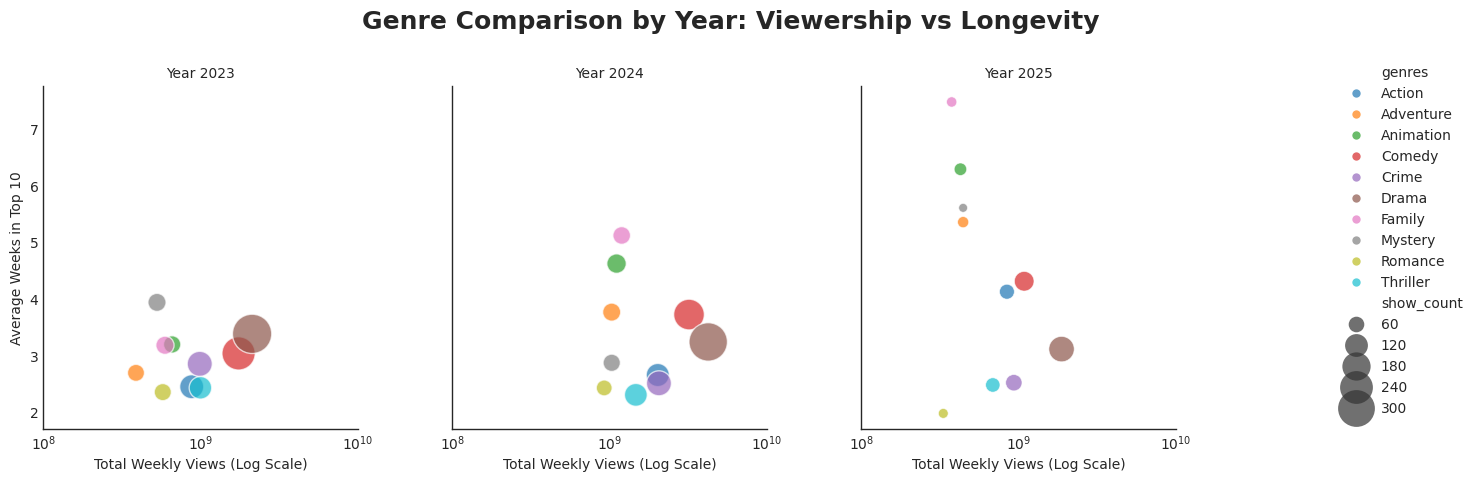

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
df = pd.read_csv('top-10_with_genres_keywords.csv')
df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

df_exploded = df.explode('genres')

# --- 2. Ïó∞ÎèÑÎ≥Ñ/Ïû•Î•¥Î≥Ñ Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥Ñ ---
genre_yearly_stats = df_exploded.groupby(['year', 'genres']).agg(
  total_weekly_views=('weekly_views', 'sum'),
  avg_cumulative_weeks=('cumulative_weeks_in_top_10', 'mean'),
  show_count=('show_title', 'nunique')
).reset_index()

# ÏãúÍ∞ÅÌôîÌï† ÏÉÅÏúÑ 10Í∞ú Ïû•Î•¥ ÏÑ†Ï†ï
top_genres_by_views = genre_yearly_stats.groupby('genres')['total_weekly_views'].sum().nlargest(10).index
analysis_df = genre_yearly_stats[genre_yearly_stats['genres'].isin(top_genres_by_views)]

# 2021ÎÖÑÍ≥º 2022ÎÖÑ Îç∞Ïù¥ÌÑ∞ Ï†úÏô∏
analysis_df = analysis_df[~analysis_df['year'].isin([2021, 2022])]


# --- 3. ÏµúÏ¢Ö Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî ---
sns.set_style("white")

g = sns.relplot(
  data=analysis_df,
  x="total_weekly_views",
  y="avg_cumulative_weeks",
  col="year",
  hue="genres",
  size="show_count",
  sizes=(40, 800),
  alpha=0.7,
  kind="scatter",
  col_wrap=3,
  height=4.5,
  aspect=1
)

# --- 4. Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ Ï†ïÎ≥¥ ÏÑ§Ï†ï ---
g.set(xscale="log")
g.set_titles("Year {col_name}")
g.fig.suptitle('Genre Comparison by Year: Viewership vs Longevity', fontsize=18, y=1.05, fontweight='bold')


# ÏÉÅÏÑ∏ XÏ∂ï ÎààÍ∏à ÏÑ§Ï†ï
tick_values = [10**8, 10**9, 10**10]
tick_labels = ['$10^8$', '$10^9$', '$10^{10}$']

for ax in g.axes.flat:
  if not ax.has_data():
    continue
  ax.set_xticks(tick_values)
  ax.set_xticklabels(tick_labels)

# --- 5. Î™®Îì† Í∑∏ÎûòÌîÑÏóê Ï∂ï Ï£ºÏÑù Ï∂îÍ∞Ä (ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ) ---
# Í∏∞Ï°¥Ïùò g.set_axis_labels() ÎåÄÏã†, Î∞òÎ≥µÎ¨∏ÏúºÎ°ú Í∞Å Í∑∏ÎûòÌîÑÏóê Ï∂ï Ïù¥Î¶ÑÏùÑ ÏßÅÏ†ë ÏÑ§Ï†ïÌï©ÎãàÎã§.
for ax in g.axes.flat:
  if not ax.has_data():
    continue
  ax.set_xlabel("Total Weekly Views (Log Scale)", fontsize=10)
  ax.set_ylabel("Average Weeks in Top 10", fontsize=10)


# --- 6. ÏµúÏ¢Ö Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï ---
g.fig.subplots_adjust(top=0.88, right=0.8, hspace=0.4, wspace=0.3)

plt.show()

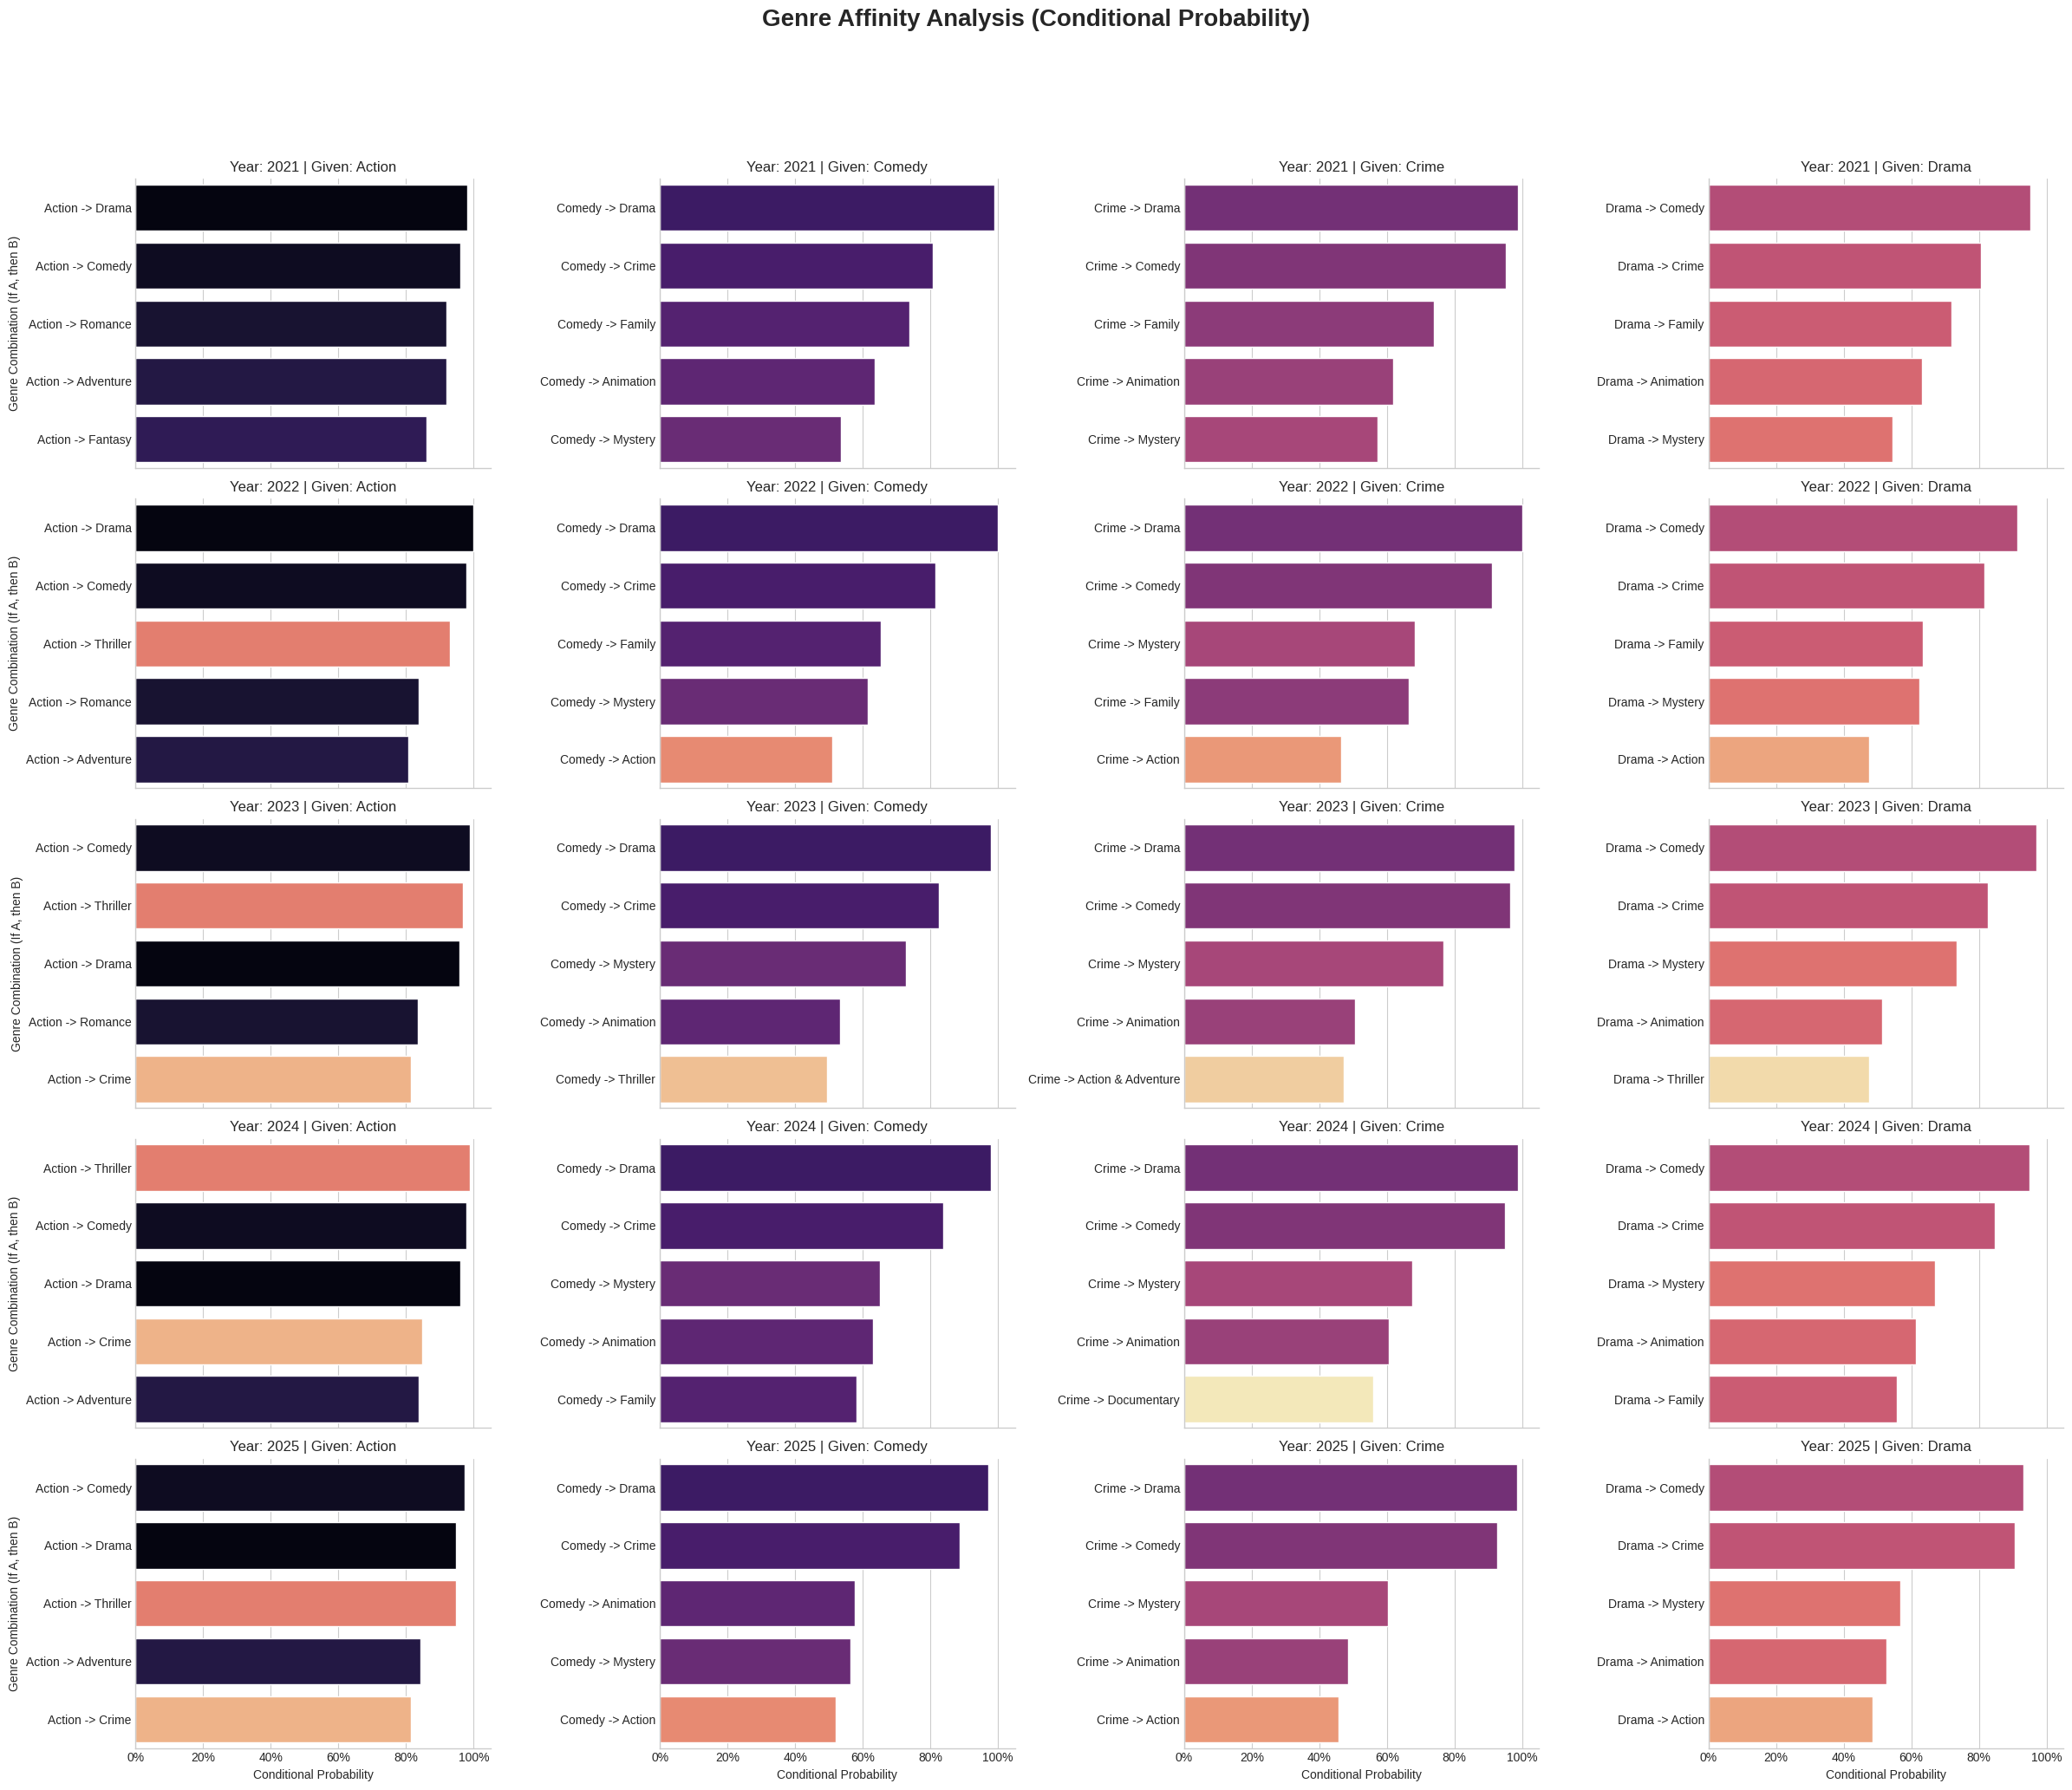

In [ ]:
  import pandas as pd
  import ast
  from itertools import permutations
  from collections import defaultdict
  import seaborn as sns
  import matplotlib.pyplot as plt
  import numpy as np # np.sumÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ import

  # --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
  df = pd.read_csv('top-10_with_genres_keywords.csv')
  df['week'] = pd.to_datetime(df['week'])
  df['year'] = df['week'].dt.year
  df['genres'] = df['genres'].apply(ast.literal_eval)


  # --- 2. Ïó∞ÎèÑÎ≥Ñ Ï°∞Í±¥Î∂Ä ÌôïÎ•† Í≥ÑÏÇ∞ ---
  all_conditional_probs = []
  analysis_years = sorted(df['year'].unique())

  for year in analysis_years:
      df_year = df[df['year'] == year]

      # (ÏàòÏ†ï 1) apply(sum) ÎåÄÏã† np.sum ÏÇ¨Ïö©
      transactions = df_year.groupby(['week', 'category'])['genres'].apply(np.sum).tolist()
      transactions = [list(set(item)) for item in transactions if item]

      if not transactions:
          continue

      genre_counts = defaultdict(int)
      pair_counts = defaultdict(int)

      for transaction in transactions:
          for genre in transaction:
              genre_counts[genre] += 1
          for g1, g2 in permutations(transaction, 2):
              pair_counts[(g1, g2)] += 1

      for (genre_A, genre_B), count_AB in pair_counts.items():
          count_A = genre_counts[genre_A]
          if count_A > 0:
              cond_prob = count_AB / count_A
              all_conditional_probs.append({
                  'year': year,
                  'Given_Genre': genre_A,
                  'Result_Genre': genre_B,
                  'prob': cond_prob
              })

  prob_df = pd.DataFrame(all_conditional_probs)


  # --- 3. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ ---
  focus_genres = ['Drama', 'Comedy', 'Crime', 'Action']
  prob_filtered = prob_df[prob_df['Given_Genre'].isin(focus_genres)]

  # (ÏàòÏ†ï 2) DeprecationWarningÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Îçî ÌòÑÎåÄÏ†ÅÏù∏ Î∞©ÏãùÏúºÎ°ú ÏΩîÎìúÎ•º ÏàòÏ†ï
  top5_df = prob_filtered.sort_values(['year', 'Given_Genre', 'prob'], ascending=[True, True, False]) \
                        .groupby(['year', 'Given_Genre']) \
                        .head(5)

  top5_df['label'] = top5_df.apply(lambda row: f"{row['Given_Genre']} -> {row['Result_Genre']}", axis=1)


  # --- 4. ÏµúÏ¢Ö Í≤∞Í≥º ÏãúÍ∞ÅÌôî ---
  # (ÏàòÏ†ï 3) hue='label' Î∞è legend=False Ï∂îÍ∞Ä
  g = sns.catplot(
      data=top5_df,
      x='prob',
      y='label',
      hue='label',       # yÏ∂ï Î≥ÄÏàòÎ•º hueÎ°ú ÏßÄÏ†ï
      col='Given_Genre',
      row='year',
      kind='bar',
      height=4,
      aspect=1.5,
      sharey=False,
      palette='magma',
      legend=False     # hueÎ•º ÏÇ¨Ïö©ÌñàÏúºÎØÄÎ°ú Î≤îÎ°ÄÎäî Ïà®ÍπÄ
  )

  # Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
  g.fig.suptitle('Genre Affinity Analysis (Conditional Probability)', fontsize=20, y=1.03, fontweight='bold')
  g.set_axis_labels('Conditional Probability', 'Genre Combination (If A, then B)')
  g.set_titles("Year: {row_name} | Given: {col_name}", size=12)

  # xÏ∂ï Î†àÏù¥Î∏îÏùÑ ÌçºÏÑºÌä∏(%) ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
  for ax in g.axes.flat:
      ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

  plt.tight_layout(rect=[0, 0, 1, 0.97])
  plt.show()

<ipython-input-4-16284685>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(top_genres))
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/yxkdbaww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/gx6f8zt6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55669', 'data', 'file=/tmp/tmpqmuqcpnx/yxkdbaww.json', 'init=/tmp/tmpqmuqcpnx/gx6f8zt6.json', 'output', 'file=/tmp/tmpqmuqcpnx/prophet_modelsez9v6r1/prophet_model-20250611045439.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:54:39 - cmdstanpy - INFO - Chain [1] start processing
INFO

ÏßÄÏ†ïÎêú 10Í∞ú Ïû•Î•¥Ïóê ÎåÄÌïú ÎØ∏Îûò Ï†êÏú†Ïú® ÏòàÏ∏°ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
Î∂ÑÏÑù ÎåÄÏÉÅ Ïû•Î•¥: ['Drama', 'Comedy', 'Crime', 'Mystery', 'Adventure', 'Family', 'Action', 'Thriller', 'Romance', 'Animation']


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/0kj191v8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/6h5ubqav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56524', 'data', 'file=/tmp/tmpqmuqcpnx/0kj191v8.json', 'init=/tmp/tmpqmuqcpnx/6h5ubqav.json', 'output', 'file=/tmp/tmpqmuqcpnx/prophet_modelplnm0soh/prophet_model-20250611045440.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:54:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:54:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/8xetk2cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqmuqcpnx/2fd2nx2y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:run


ÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


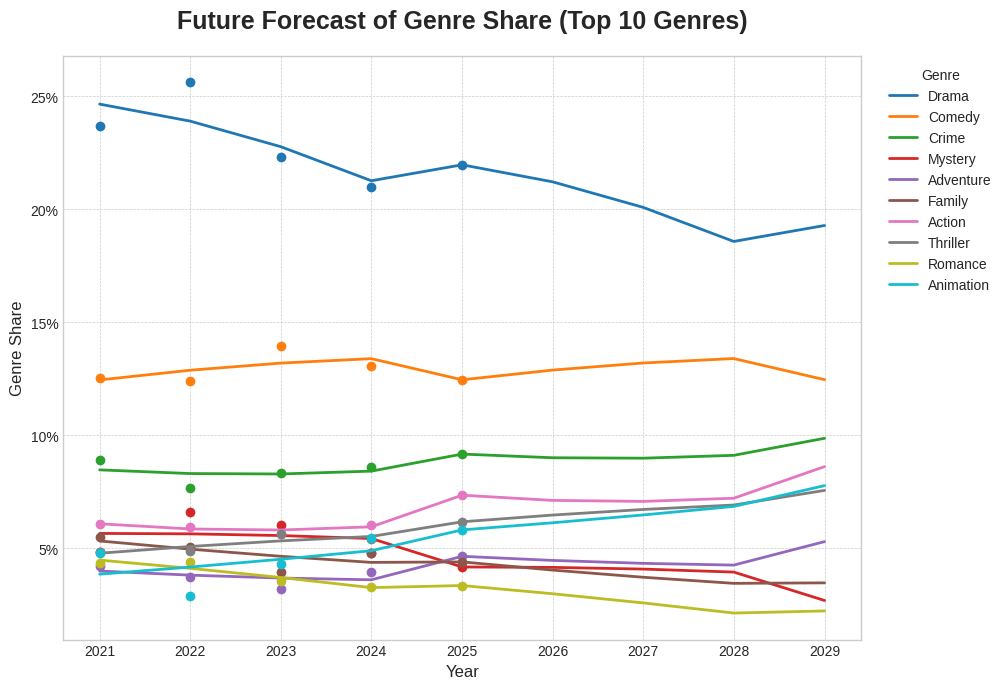


--- Ìñ•ÌõÑ 4ÎÖÑÍ∞Ñ Ïû•Î•¥Î≥Ñ ÏòàÏÉÅ Ï†êÏú†Ïú® (%) ---
      Drama  Comedy  Crime  Mystery  Adventure  Family  Action  Thriller  Romance  Animation
ds                                                                                          
2026 21.21%  12.88%  9.00%    4.15%      4.46%   4.03%   7.11%     6.46%    2.98%      6.12%
2027 20.08%  13.19%  8.98%    4.07%      4.33%   3.71%   7.07%     6.71%    2.58%      6.47%
2028 18.57%  13.39%  9.11%    3.94%      4.25%   3.44%   7.21%     6.91%    2.13%      6.85%
2029 19.28%  12.45%  9.86%    2.68%      5.29%   3.46%   8.61%     7.56%    2.22%      7.77%


In [4]:
# 1. Prophet Îì± ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
# !pip install prophet pandas matplotlib

import pandas as pd
import ast
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # ÏÉâÏÉÅ ÏßÄÏ†ïÏùÑ ÏúÑÌï¥ import
import numpy as np

# --- 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥ ÎπÑÏú® Í≥ÑÏÇ∞) ---
# Colab ÏôºÌé∏Ïùò ÌååÏùº ÏïÑÏù¥ÏΩòÏùÑ ÌÅ¥Î¶≠ÌïòÏó¨ 'top-10_with_genres_keywords.csv' ÌååÏùºÏùÑ ÏóÖÎ°úÎìúÌï¥Ï£ºÏÑ∏Ïöî.
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv' ÌååÏùºÏùÑ ColabÏóê ÏóÖÎ°úÎìúÌñàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year

# Î¨∏ÏûêÏó¥Î°ú Îêú Î¶¨Ïä§Ìä∏Î•º Ïã§Ï†ú Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df['genres'] = df['genres'].apply(ast.literal_eval)

# Í∞Å ÏòÅÌôî/ÏáºÎ•º Ïû•Î•¥Î≥ÑÎ°ú Î∂ÑÎ¶¨ (explode)
df_exploded = df.explode('genres')

# Ïó∞ÎèÑÏôÄ Ïû•Î•¥Î≥ÑÎ°ú Îì±Ïû• ÌöüÏàòÎ•º Í≥ÑÏÇ∞
genre_counts = df_exploded.groupby(['year', 'genres']).size().reset_index(name='count')

# ÌîºÎ≤ó ÌÖåÏù¥Î∏îÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Íµ¨ÏÑ± (Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥ Îì±Ïû• ÌöüÏàò)
pivot_df = genre_counts.pivot(index='year', columns='genres', values='count').fillna(0)

# Í∞Å Ïó∞ÎèÑ(Ìñâ)Ïùò Ìï©Í≥ÑÎ°ú ÎÇòÎàÑÏñ¥ ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞
ratio_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# ProphetÏùÑ ÏúÑÌï¥ ÎÇ†Ïßú ÌòïÏãùÏúºÎ°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò ('2021' -> '2021-01-01')
ratio_df.index = pd.to_datetime(ratio_df.index.astype(str) + '-01-01')

# --- 3. Ï†ÑÏ≤¥ Ïû•Î•¥Ïóê ÎåÄÌïú ÎØ∏Îûò ÏòàÏ∏° Ïã§Ìñâ ---

# --- *** ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ ÏãúÏûë *** ---
# Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎèôÏïàÏùò ÌèâÍ∑† ÎπÑÏú®ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÏúÑ 9Í∞ú Ïû•Î•¥Î•º ÏÑ†Ï†ïÌïòÎäî ÎåÄÏã†,
# ÏÇ¨Ïö©ÏûêÍªòÏÑú ÏßÅÏ†ë ÏßÄÏ†ïÌïòÏã† 10Í∞ú Ïû•Î•¥Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
top_genres = [
    'Drama', 'Comedy', 'Crime', 'Mystery', 'Adventure',
    'Family', 'Action', 'Thriller', 'Romance', 'Animation'
]
# --- *** ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ ÎÅù *** ---


# ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
all_forecasts_df = pd.DataFrame()

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Figure Ï§ÄÎπÑ
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Í∞Å Ïû•Î•¥Ïóê ÎåÄÌïú ÏÉâÏÉÅ Îßµ ÏÉùÏÑ± (10Í∞ú Ïû•Î•¥Ïù¥ÎØÄÎ°ú tab10 Ïª¨Îü¨ÎßµÏù¥ Ï†ÅÌï©)
colors = cm.get_cmap('tab10', len(top_genres))

print(f"ÏßÄÏ†ïÎêú {len(top_genres)}Í∞ú Ïû•Î•¥Ïóê ÎåÄÌïú ÎØ∏Îûò Ï†êÏú†Ïú® ÏòàÏ∏°ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
print(f"Î∂ÑÏÑù ÎåÄÏÉÅ Ïû•Î•¥: {top_genres}")

for i, genre in enumerate(top_genres):
    # ratio_dfÏóê Ìï¥Îãπ Ïû•Î•¥Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏
    if genre not in ratio_df.columns:
        print(f"Í≤ΩÍ≥†: '{genre}' Ïû•Î•¥Í∞Ä Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÏñ¥ Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue

    # ProphetÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± ('ds'ÏôÄ 'y' Ïª¨ÎüºÎ™Ö ÏÇ¨Ïö©)
    prophet_df = ratio_df[[genre]].reset_index()
    prophet_df.columns = ['ds', 'y']

    # Prophet Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(prophet_df)

    # ÎØ∏Îûò ÏòàÏ∏° (Ìñ•ÌõÑ 4ÎÖÑ)
    future = model.make_future_dataframe(periods=4, freq='YS') # YS: Ïó∞Ï¥à(Year Start) Í∏∞Ï§Ä
    forecast = model.predict(future)

    # ÏãúÍ∞ÅÌôî: Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞(Ï†ê)ÏôÄ ÎØ∏Îûò ÏòàÏ∏°(ÏÑ†)ÏùÑ Ìï®Íªò Í∑∏Î¶ΩÎãàÎã§.
    ax.plot(prophet_df['ds'], prophet_df['y'], 'o', color=colors(i), markersize=6)
    ax.plot(forecast['ds'], forecast['yhat'], '-', color=colors(i), linewidth=2, label=f'{genre}')

    # ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÄÏû•
    forecast_subset = forecast[['ds', 'yhat']].rename(columns={'yhat': genre})
    if all_forecasts_df.empty:
        all_forecasts_df = forecast_subset
    else:
        all_forecasts_df = pd.merge(all_forecasts_df, forecast_subset, on='ds', how='outer')

print("\nÏòàÏ∏°Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

# --- 4. Í∑∏ÎûòÌîÑ ÏµúÏ¢Ö ÏÑ§Ï†ï ---
# --- *** ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ ÏãúÏûë *** ---
ax.set_title('Future Forecast of Genre Share (Top 10 Genres)', fontsize=18, fontweight='bold', pad=20)
# --- *** ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ ÎÅù *** ---
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Genre Share', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
ax.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Î≤îÎ°Ä Í≥µÍ∞Ñ ÌôïÎ≥¥
plt.show()

# --- 5. ÏòàÏ∏° Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†• ---
# Î≥¥Í∏∞ Ï¢ãÍ≤å Ïù∏Îç±Ïä§Î•º Ïó∞ÎèÑÎßå ÌëúÏãúÌïòÎèÑÎ°ù Î≥ÄÍ≤Ω
if not all_forecasts_df.empty:
    all_forecasts_df['ds'] = all_forecasts_df['ds'].dt.year
    all_forecasts_df = all_forecasts_df.set_index('ds')

    print("\n--- Ìñ•ÌõÑ 4ÎÖÑÍ∞Ñ Ïû•Î•¥Î≥Ñ ÏòàÏÉÅ Ï†êÏú†Ïú® (%) ---")
    # ÏÜåÏàòÏ†êÏùÑ ÌçºÏÑºÌä∏Î°ú Î≥ÄÌôòÌïòÏó¨ Ï∂úÎ†•
    future_predictions = all_forecasts_df.tail(4) * 100
    print(future_predictions.to_string(float_format='{:.2f}%'.format))
else:
    print("\nÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ Í≤∞Í≥º ÌÖåÏù¥Î∏îÏùÑ Ï∂úÎ†•Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

--- 1. Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥ Ï†êÏú†Ïú® Í≥ÑÏÇ∞ Ï§ë (Prophet Ïä§ÌÅ¨Î¶ΩÌä∏ Î∞©Ïãù) ---

--- ÏÉÅÏúÑ 9Í∞ú Ïû•Î•¥ ÎåÄÏÉÅ ÏòàÏ∏° ÏàòÌñâ ---
Î∂ÑÏÑù ÎåÄÏÉÅ Ïû•Î•¥: ['Drama', 'Comedy', 'Crime', 'Action', 'Thriller', 'Mystery', 'Family', 'Animation', 'Action & Adventure']

--- 3.1 Í∞ÄÏ§ë Ïù¥Îèô ÌèâÍ∑†(WMA)ÏúºÎ°ú 2026-2029ÎÖÑ Ï†êÏú†Ïú® ÏòàÏ∏° ---

--- 3.2 ÌôÄÌä∏Ïùò ÏÑ†Ìòï Ï∂îÏÑ∏ Î™®ÌòïÏúºÎ°ú 2026-2029ÎÖÑ Ï†êÏú†Ïú® ÏòàÏ∏° ---

--- 3.3 ARIMA Î™®Îç∏Î°ú 2026-2029ÎÖÑ Ï†êÏú†Ïú® ÏòàÏ∏° ---


--- ÏòàÏ∏° Í≤∞Í≥º ÏöîÏïΩ (2026-2029ÎÖÑ) ---

--- WMA ÏòàÏ∏° (ÏòàÏÉÅ Ï†êÏú†Ïú® %) ---
      Drama  Comedy  Crime  Action  Thriller  Mystery  Family  Animation  Action & Adventure
2026 21.74%  12.92%  8.82%   6.60%     5.82%    4.73%   4.43%      5.40%               4.40%
2027 21.66%  12.81%  8.88%   6.71%     5.84%    4.58%   4.50%      5.54%               4.41%
2028 21.74%  12.77%  8.92%   6.81%     5.90%    4.54%   4.46%      5.55%               4.39%
2029 21.72%  12.81%  8.89%   6.74%     5.87%    4.59%   4.47%      5.5

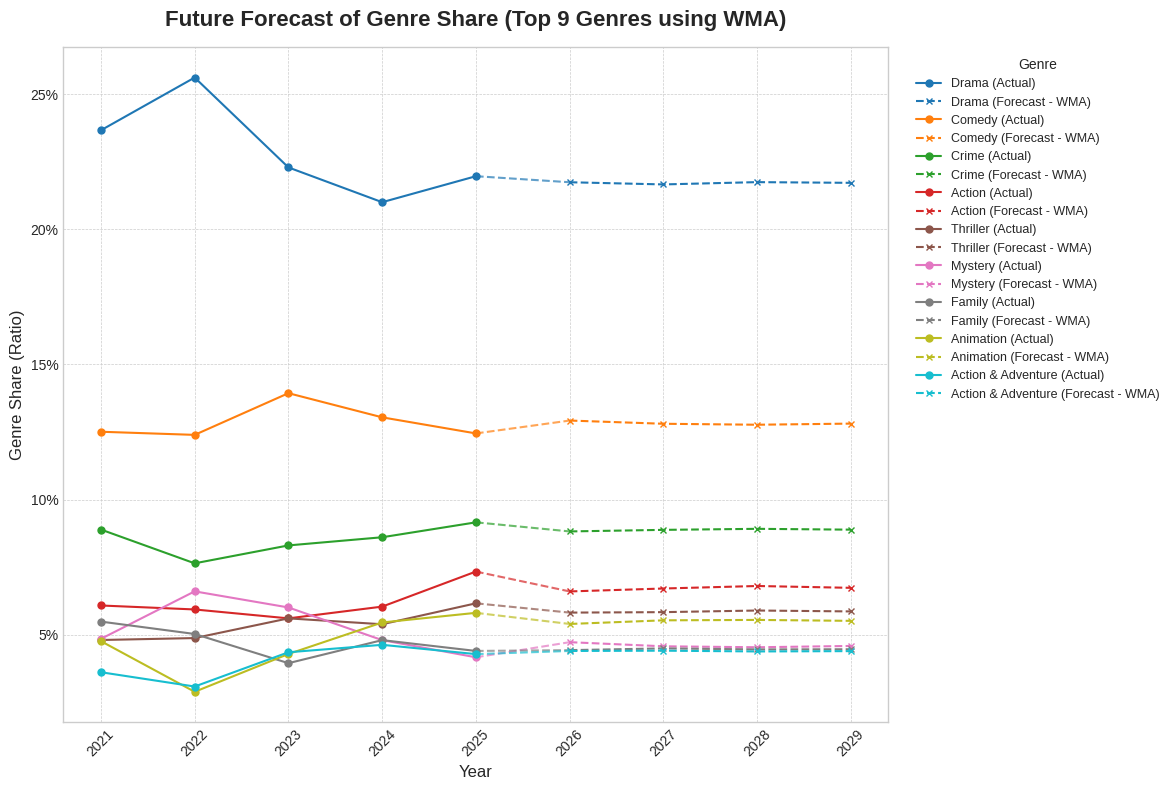


--- Holt ÏòàÏ∏° Í∑∏ÎûòÌîÑ ---


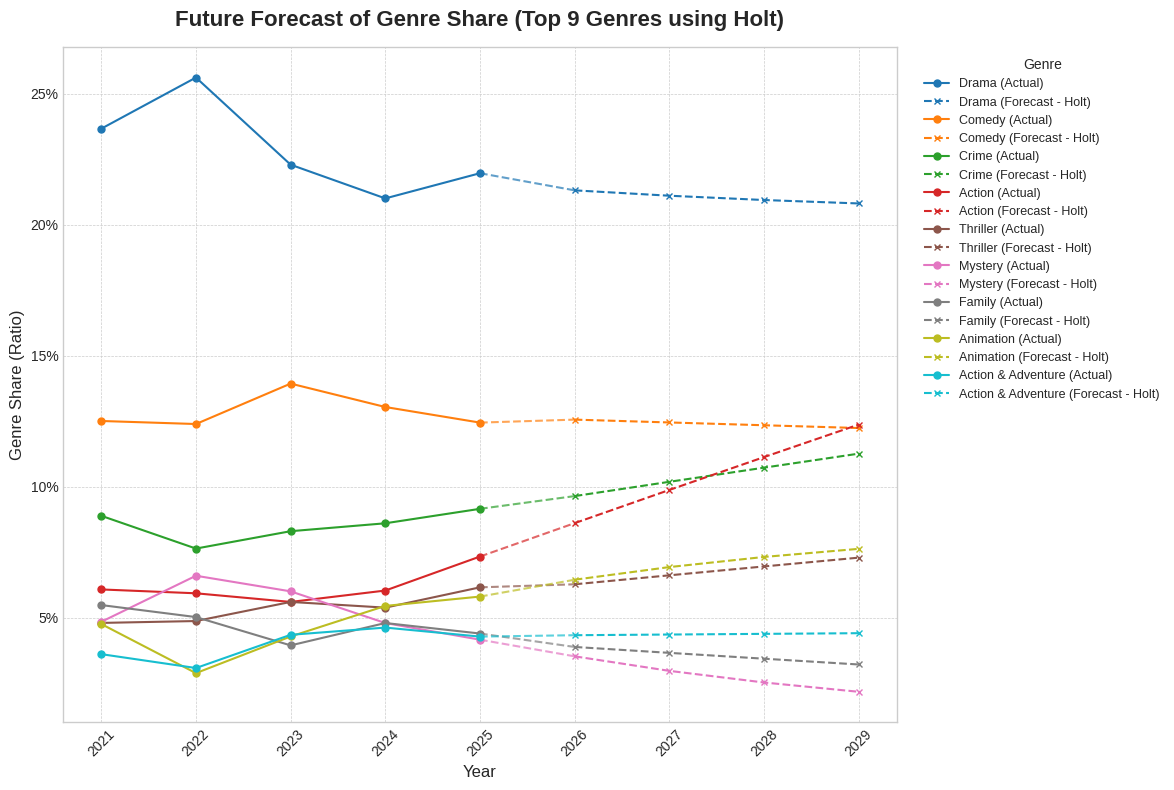


--- ARIMA ÏòàÏ∏° Í∑∏ÎûòÌîÑ ---


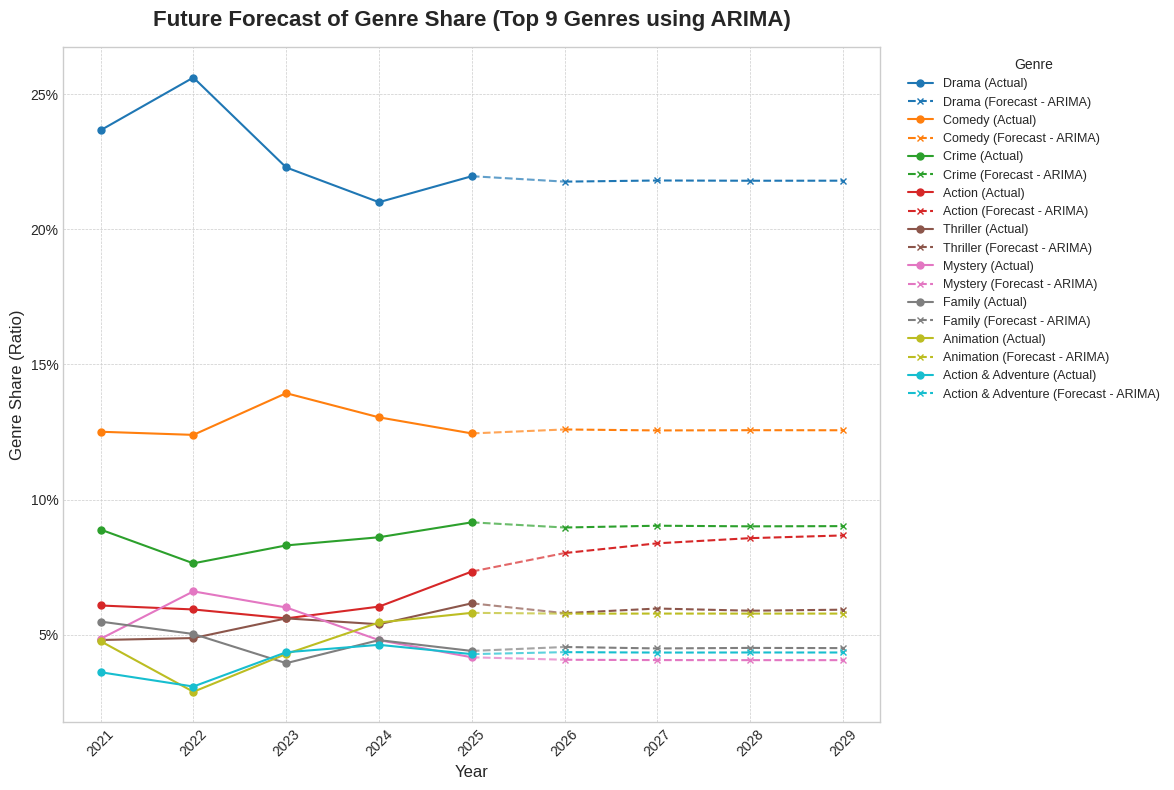

In [ ]:
import pandas as pd
import ast
from mlxtend.preprocessing import TransactionEncoder # TransactionEncoderÎäî ÏßÅÏ†ë ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÏúºÎÇò, mlxtend ÏùºÎ∂ÄÎ°ú Î°úÎìú
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import Holt # Holt's Linear Trend
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Ïà®Í∏∞Í∏∞
warnings.filterwarnings("ignore")

# --- 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Prophet Ïä§ÌÅ¨Î¶ΩÌä∏ÏôÄ ÎèôÏùºÌïú Î∞©ÏãùÏúºÎ°ú Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥ ÎπÑÏú® Í≥ÑÏÇ∞) ---
try:
    df = pd.read_csv('top-10_with_genres_keywords.csv')
except FileNotFoundError:
    print("ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: 'top-10_with_genres_keywords.csv'")
    raise

df['week'] = pd.to_datetime(df['week'])
df['year'] = df['week'].dt.year
df['genres'] = df['genres'].apply(ast.literal_eval)

print("--- 1. Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥ Ï†êÏú†Ïú® Í≥ÑÏÇ∞ Ï§ë (Prophet Ïä§ÌÅ¨Î¶ΩÌä∏ Î∞©Ïãù) ---")
# Í∞Å ÏòÅÌôî/ÏáºÎ•º Ïû•Î•¥Î≥ÑÎ°ú Î∂ÑÎ¶¨ (explode)
df_exploded = df.explode('genres')

# Ïó∞ÎèÑÏôÄ Ïû•Î•¥Î≥ÑÎ°ú Îì±Ïû• ÌöüÏàòÎ•º Í≥ÑÏÇ∞
genre_counts = df_exploded.groupby(['year', 'genres']).size().reset_index(name='count')

# ÌîºÎ≤ó ÌÖåÏù¥Î∏îÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Íµ¨ÏÑ± (Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥ Îì±Ïû• ÌöüÏàò)
pivot_df = genre_counts.pivot(index='year', columns='genres', values='count').fillna(0)

# Í∞Å Ïó∞ÎèÑ(Ìñâ)Ïùò Ìï©Í≥ÑÎ°ú ÎÇòÎàÑÏñ¥ ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞
# Ïù¥ ratio_dfÍ∞Ä Ïù¥Ï†ú Î™®Îì† Î™®Îç∏Ïùò Í∏∞Î∞òÏù¥ Îê©ÎãàÎã§.
ratio_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Î™®Îç∏ ÏûÖÎ†•ÏùÑ ÏúÑÌï¥ Ïù∏Îç±Ïä§Î•º PeriodIndexÎ°ú Î≥ÄÌôò (Ïó∞Í∞Ñ Îç∞Ïù¥ÌÑ∞ Î™ÖÏãú)
try:
    ratio_df.index = pd.to_datetime(ratio_df.index.astype(str)).to_period('A')
except Exception as e:
    print(f"ratio_df Ïù∏Îç±Ïä§ Î≥ÄÌôò Ï§ë Ïò§Î•ò: {e}. Ïó∞ÎèÑ Ïù∏Îç±Ïä§Î•º Ï†ïÏàòÎ°ú Ïú†ÏßÄÌï©ÎãàÎã§.")


if ratio_df.empty:
    print("Ïû•Î•¥ Ï†êÏú†Ïú® Îç∞Ïù¥ÌÑ∞Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏóàÏäµÎãàÎã§. Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit()

# --- 2. ÏÉÅÏúÑ NÍ∞ú Ïû•Î•¥ ÏÑ†Ï†ï ---
top_n = 9
# ratio_dfÏóê Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäîÏßÄ, Ïª¨ÎüºÏù¥ Ïà´ÏûêÏù∏ÏßÄ ÌôïÏù∏ ÌõÑ mean() Í≥ÑÏÇ∞
if ratio_df.empty or len(ratio_df.columns) == 0:
    print("Ï†êÏú†Ïú® Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏïÑ ÏÉÅÏúÑ Ïû•Î•¥Î•º ÏÑ†Ï†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    top_genres_list = []
else:
    # Î™®Îì† Ïó¥Ïù¥ Ïà´ÏûêÏù∏ÏßÄ ÌôïÏù∏ÌïòÍ≥†, Ïà´ÏûêÌòïÏù¥ ÏïÑÎãå Ïó¥ÏùÄ ÌèâÍ∑† Í≥ÑÏÇ∞ÏóêÏÑú Ï†úÏô∏ÌïòÍ±∞ÎÇò Î≥ÄÌôò
    # Ïó¨Í∏∞ÏÑúÎäî Î™®Îì† Ïó¥Ïù¥ Ï†êÏú†Ïú®(Ïà´Ïûê)Ïù¥ÎùºÍ≥† Í∞ÄÏ†ï
    top_genres_list = ratio_df.mean(axis=0).nlargest(top_n).index.tolist()


if not top_genres_list:
    print(f"ÏÉÅÏúÑ {top_n}Í∞ú Ïû•Î•¥Î•º ÏÑ†Ï†ïÌï† Ïàò ÏóÜÏóàÏäµÎãàÎã§. Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit()

print(f"\n--- ÏÉÅÏúÑ {len(top_genres_list)}Í∞ú Ïû•Î•¥ ÎåÄÏÉÅ ÏòàÏ∏° ÏàòÌñâ ---")
print(f"Î∂ÑÏÑù ÎåÄÏÉÅ Ïû•Î•¥: {top_genres_list}")

# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Ïó∞ÎèÑ Ïª¨ÎüºÎì§ (ratio_df Í∏∞Ï§Ä, PeriodIndex)
actual_year_periods = ratio_df.index
if actual_year_periods.empty:
    print("ratio_dfÏóê Ïú†Ìö®Ìïú Ïó∞ÎèÑÎ≥Ñ ÏßÄÏßÄÎèÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. Î∂ÑÏÑùÏùÑ Ï§ëÎã®Ìï©ÎãàÎã§.")
    exit()

# forecast_start_year = actual_year_periods[-1].year + 1 # PeriodIndexÏóêÏÑú Ïó∞ÎèÑ Ï∂îÏ∂ú
forecast_start_period = actual_year_periods[-1] + 1

forecast_periods_list = pd.period_range(start=forecast_start_period, periods=4, freq='A')
num_forecast_steps = len(forecast_periods_list)

# Í≤∞Í≥º Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎîïÏÖîÎÑàÎ¶¨
all_forecasts_results = defaultdict(lambda: pd.DataFrame(index=forecast_periods_list))


# --- 3. ÏòàÏ∏° Î™®Îç∏Î≥Ñ Ïã§Ìñâ ---

# 3.1 Í∞ÄÏ§ë Ïù¥Îèô ÌèâÍ∑† (WMA)
print(f"\n--- 3.1 Í∞ÄÏ§ë Ïù¥Îèô ÌèâÍ∑†(WMA)ÏúºÎ°ú {forecast_periods_list[0].year}-{forecast_periods_list[-1].year}ÎÖÑ Ï†êÏú†Ïú® ÏòàÏ∏° ---")
wma_predictions = defaultdict(list)
wma_window = 3
wma_weights = np.array([0.2, 0.3, 0.5]) # Ïò§ÎûòÎêú Í≤É -> ÏµúÏã† Í≤É ÏàúÏÑú

for genre in top_genres_list:
    if genre not in ratio_df.columns: continue # Ìï¥Îãπ Ïû•Î•¥Í∞Ä ratio_dfÏóê ÏóÜÏúºÎ©¥ Í±¥ÎÑàÎõ∞Í∏∞
    series = ratio_df[genre].dropna() # ratio_dfÏóêÏÑú ÏßÅÏ†ë ÏãúÎ¶¨Ï¶à Í∞ÄÏ†∏Ïò§Í∏∞
    if len(series) < wma_window:
        for _ in forecast_periods_list: wma_predictions[genre].append(np.nan)
        continue

    history = list(series.values)
    forecasts_for_genre = []
    current_history = history.copy()

    for _ in range(num_forecast_steps):
        if len(current_history) < wma_window:
             forecast_value = np.nan
        else:
            y_to_forecast = current_history[-wma_window:]
            forecast_value = np.dot(y_to_forecast, wma_weights)
            forecast_value = max(0, min(1, forecast_value)) # Ï†êÏú†Ïú®ÏùÄ 0Í≥º 1 ÏÇ¨Ïù¥
        forecasts_for_genre.append(forecast_value)
        current_history.append(forecast_value)
    wma_predictions[genre] = forecasts_for_genre
all_forecasts_results['WMA'] = pd.DataFrame.from_dict(wma_predictions, orient='index', columns=forecast_periods_list).T


# 3.2 ÌôÄÌä∏Ïùò ÏÑ†Ìòï Ï∂îÏÑ∏ Î™®Ìòï
print(f"\n--- 3.2 ÌôÄÌä∏Ïùò ÏÑ†Ìòï Ï∂îÏÑ∏ Î™®ÌòïÏúºÎ°ú {forecast_periods_list[0].year}-{forecast_periods_list[-1].year}ÎÖÑ Ï†êÏú†Ïú® ÏòàÏ∏° ---")
holt_predictions = defaultdict(list)
for genre in top_genres_list:
    if genre not in ratio_df.columns: continue
    series = ratio_df[genre].dropna()
    if len(series) < 2:
        for _ in forecast_periods_list: holt_predictions[genre].append(np.nan)
        continue
    try:
        # Holt Î™®Îç∏ÏùÄ PeriodIndexÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•
        model_holt = Holt(series, exponential=False, damped_trend=True) # Í∞êÏá† Ï∂îÏÑ∏ Ï†ÅÏö©
        fit_holt = model_holt.fit(optimized=True)
        forecast_holt = fit_holt.forecast(num_forecast_steps)
        forecast_holt = np.clip(forecast_holt, 0, 1)
        holt_predictions[genre] = forecast_holt.tolist()
    except Exception as e:
        for _ in forecast_periods_list: holt_predictions[genre].append(np.nan)
all_forecasts_results['Holt'] = pd.DataFrame.from_dict(holt_predictions, orient='index', columns=forecast_periods_list).T

# 3.3 ARIMA Î™®Îç∏
print(f"\n--- 3.3 ARIMA Î™®Îç∏Î°ú {forecast_periods_list[0].year}-{forecast_periods_list[-1].year}ÎÖÑ Ï†êÏú†Ïú® ÏòàÏ∏° ---")
arima_predictions = defaultdict(list)
for genre in top_genres_list:
    if genre not in ratio_df.columns: continue
    series = ratio_df[genre].dropna()
    if len(series) < 3:
        for _ in forecast_periods_list: arima_predictions[genre].append(np.nan)
        continue
    try:
        # ARIMAÎäî PeriodIndexÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
        arima_order = (1,1,0) if len(series) > 2 else (0,1,0)
        model_arima = ARIMA(series, order=arima_order)
        model_arima_fit = model_arima.fit()
        forecast_arima = model_arima_fit.forecast(steps=num_forecast_steps)
        forecast_arima = np.clip(forecast_arima.values, 0, 1)
        arima_predictions[genre] = forecast_arima.tolist()
    except Exception as e:
        for _ in forecast_periods_list: arima_predictions[genre].append(np.nan)
all_forecasts_results['ARIMA'] = pd.DataFrame.from_dict(arima_predictions, orient='index', columns=forecast_periods_list).T


# --- 4. Í≤∞Í≥º Ï∂úÎ†• (Ìëú) ---
print(f"\n\n--- ÏòàÏ∏° Í≤∞Í≥º ÏöîÏïΩ ({forecast_periods_list[0].year}-{forecast_periods_list[-1].year}ÎÖÑ) ---")
for model_name, df_forecast_table in all_forecasts_results.items():
    print(f"\n--- {model_name} ÏòàÏ∏° (ÏòàÏÉÅ Ï†êÏú†Ïú® %) ---")
    if df_forecast_table.empty:
        print("ÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
    else:
        # Ïù∏Îç±Ïä§Î•º Ï†ïÏàò Ïó∞ÎèÑÎ°ú Î≥ÄÌôòÌïòÏó¨ Ï∂úÎ†•
        df_to_print = df_forecast_table.copy()
        df_to_print.index = df_to_print.index.year # PeriodIndexÎ•º Ï†ïÏàò Ïó∞ÎèÑÎ°ú
        df_to_print_selected_genres = df_to_print.loc[:, top_genres_list].copy() # top_genres_list ÏàúÏÑúÎåÄÎ°ú
        print((df_to_print_selected_genres * 100).to_string(float_format='{:.2f}%'.format, na_rep=' N/A  '))

# --- 5. Í≤∞Í≥º ÏãúÍ∞ÅÌôî (Í∑∏ÎûòÌîÑ) ---
print(f"\n\n--- ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî ({forecast_periods_list[0].year}-{forecast_periods_list[-1].year}ÎÖÑ) ---")
plt.style.use('seaborn-v0_8-whitegrid')
colors = cm.get_cmap('tab10', len(top_genres_list))

historical_years_for_plot = ratio_df.index.year # xÏ∂ïÏö© Í≥ºÍ±∞ Ïó∞ÎèÑ (Ï†ïÏàò)
forecast_years_for_plot = forecast_periods_list.year # xÏ∂ïÏö© ÎØ∏Îûò Ïó∞ÎèÑ (Ï†ïÏàò)

for model_idx, (model_name, df_forecast) in enumerate(all_forecasts_results.items()):
    fig, ax = plt.subplots(figsize=(14, 8))

    if df_forecast.empty:
        ax.text(0.5, 0.5, "No forecast data available for this model.",
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'{model_name} Forecasts - No Data', fontsize=16, fontweight='bold', pad=15)
        plt.show()
        continue

    print(f"\n--- {model_name} ÏòàÏ∏° Í∑∏ÎûòÌîÑ ---")

    for i, genre in enumerate(top_genres_list):
        if genre in ratio_df.columns:
            historical_genre_series = ratio_df[genre].dropna()
            if not historical_genre_series.empty:
                 ax.plot(historical_genre_series.index.year, historical_genre_series.values,
                        marker='o', linestyle='-', color=colors(i % 10), label=f'{genre} (Actual)', markersize=5)

        if genre in df_forecast.columns:
            forecast_genre_series = df_forecast[genre].dropna()
            if not forecast_genre_series.empty:
                # Í≥ºÍ±∞ ÎßàÏßÄÎßâ ÏßÄÏ†êÍ≥º ÏòàÏ∏° ÏãúÏûë ÏßÄÏ†êÏùÑ Ïó∞Í≤∞
                if not historical_genre_series.empty and not forecast_genre_series.empty: # Îëò Îã§ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏñ¥Ïïº Ïó∞Í≤∞
                    ax.plot([historical_genre_series.index[-1].year, forecast_genre_series.index[0].year],
                            [historical_genre_series.values[-1], forecast_genre_series.values[0]],
                            linestyle='--', color=colors(i % 10), alpha=0.7)

                ax.plot(forecast_genre_series.index.year, forecast_genre_series.values,
                        marker='x', linestyle='--', color=colors(i % 10), label=f'{genre} (Forecast - {model_name})', markersize=5)
        elif genre in ratio_df.columns: # Í≥ºÍ±∞Îäî ÏûàÏóàÏúºÎÇò ÏòàÏ∏° ÏóÜÎäî Í≤ΩÏö∞ Î≤îÎ°ÄÏö©
                 ax.plot([], [], marker='', linestyle='', label=f'{genre} (Forecast N/A)')

    ax.set_title(f'Future Forecast of Genre Share (Top {len(top_genres_list)} Genres using {model_name})', fontsize=16, fontweight='bold', pad=15)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Genre Share (Ratio)', fontsize=12)
    ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
    ax.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=9)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    all_plot_years = np.unique(np.concatenate((historical_years_for_plot, forecast_years_for_plot)))
    ax.set_xticks(all_plot_years)
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()